In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
import tensorflow as tf
import tensorflow
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import pandas as pd
import numpy as np
np.random.seed(5)
tf.random.set_seed(5)

## eda

In [ ]:
mitbih_df= pd.read_csv("/content/drive/MyDrive/LLM_NOTEBOOKS/archive/mitbih_train.csv", header=None)
abmitbih_df= pd.read_csv("/content/drive/MyDrive/LLM_NOTEBOOKS/archive/mitbih_test.csv", header=None)

In [ ]:
mitbih_df.head(30)

0         1         2         3         4         5         6    \
0   0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1   0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2   1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3   0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4   0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
5   0.927461  1.000000  0.626943  0.193437  0.094991  0.072539  0.043178   
6   0.423611  0.791667  1.000000  0.256944  0.000000  0.277778  0.465278   
7   0.716814  0.539823  0.283186  0.129794  0.064897  0.076696  0.026549   
8   0.874214  0.849057  0.480084  0.058700  0.090147  0.310273  0.387841   
9   1.000000  0.996086  0.694716  0.336595  0.238748  0.268102  0.191781   
10  0.985507  0.880435  0.518116  0.213768  0.126812  0.119565  0.083333   
11  1.000000  0.657563  0.178571  0.178571  0.136555  0.035714  0.021008   
12  0.986737  0.962865  0.809019  0.358090  0.082228  0.161804  0.137931   
13  1.000000  0.912651  0.593373  0.045181  0.036145  0.177711  0.316265   
14  1.000000  0.477157  0.060914  0.073604  0.088832  0.043147  0.035533   
15  0.985632  0.785920  0.359195  0.096264  0.043103  0.145115  0.196839   
16  1.000000  0.872727  0.358442  0.057143  0.064935  0.090909  0.064935   
17  0.986072  0.506964  0.350975  0.214485  0.133705  0.097493  0.083565   
18  1.000000  0.935010  0.622642  0.291405  0.236897  0.224319  0.157233   
19  0.979644  0.974555  0.765903  0.315522  0.073791  0.160305  0.145038   
20  0.950192  0.777778  0.398467  0.000000  0.000000  0.118774  0.137931   
21  1.000000  0.920245  0.680982  0.466258  0.257669  0.104294  0.085890   
22  0.813754  0.719198  0.398281  0.000000  0.097421  0.237822  0.303725   
23  0.997118  0.786744  0.072046  0.092219  0.083573  0.089337  0.069164   
24  1.000000  0.536341  0.000000  0.062657  0.062657  0.065163  0.045113   
25  0.993289  0.825503  0.422819  0.154362  0.104027  0.117450  0.077181   
26  0.961694  0.747984  0.135081  0.002016  0.072581  0.072581  0.062500   
27  0.989858  0.906694  0.726166  0.553753  0.359026  0.174442  0.052738   
28  0.975881  0.923933  0.549165  0.230056  0.187384  0.172542  0.116883   
29  0.962662  0.928571  0.441558  0.000000  0.051948  0.176948  0.181818   

         7         8         9    ...       178       179       180      181  \
0   0.085784  0.058824  0.049020  ...  0.000000  0.000000  0.000000  0.00000   
1   0.088319  0.074074  0.082621  ...  0.000000  0.000000  0.000000  0.00000   
2   0.043243  0.054054  0.045946  ...  0.000000  0.000000  0.000000  0.00000   
3   0.060773  0.066298  0.058011  ...  0.000000  0.000000  0.000000  0.00000   
4   0.089202  0.117371  0.150235  ...  0.000000  0.000000  0.000000  0.00000   
5   0.053541  0.093264  0.189983  ...  0.000000  0.000000  0.000000  0.00000   
6   0.520833  0.472222  0.555556  ...  0.000000  0.000000  0.000000  0.00000   
7   0.032448  0.008850  0.044248  ...  0.000000  0.000000  0.000000  0.00000   
8   0.385744  0.389937  0.392034  ...  0.000000  0.000000  0.000000  0.00000   
9   0.174168  0.164384  0.187867  ...  0.000000  0.000000  0.000000  0.00000   
10  0.079710  0.065217  0.068841  ...  0.000000  0.000000  0.000000  0.00000   
11  0.067227  0.159664  0.252101  ...  0.000000  0.000000  0.000000  0.00000   
12  0.079576  0.031830  0.063660  ...  0.000000  0.000000  0.000000  0.00000   
13  0.343374  0.376506  0.373494  ...  0.000000  0.000000  0.000000  0.00000   
14  0.027919  0.015228  0.015228  ...  0.000000  0.000000  0.000000  0.00000   
15  0.175287  0.156609  0.159483  ...  0.000000  0.000000  0.000000  0.00000   
16  0.049351  0.062338  0.044156  ...  0.000000  0.000000  0.000000  0.00000   
17  0.091922  0.072423  0.072423  ...  0.000000  0.000000  0.000000  0.00000   
18  0.140461  0.138365  0.136268  ...  0.000000  0.000000  0.000000  0.00000   
19  0.068702  0.017812  0.033079  ...  0.000000  0.0

In [ ]:
normal_df= pd.read_csv("/content/drive/MyDrive/LLM_NOTEBOOKS/archive/ptbdb_normal.csv", header=None)
abnormal_df= pd.read_csv("/content/drive/MyDrive/LLM_NOTEBOOKS/archive/ptbdb_abnormal.csv", header=None)

In [ ]:
def get_dataframe_info(df):
    info = {
        "Column Names": df.columns.tolist(),
        "Data Types": df.dtypes,
        "Shape": df.shape,
        "Info": df.info(),
        "Description": df.describe(),
        "Missing Values": {
            "Total": df.isnull().sum().sum(),
            "By Column": df.isnull().sum()
        }
    }
    return info


In [ ]:
print(get_dataframe_info(normal_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB
{'Column Names': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187], 'Dat

In [ ]:
normal_df.head(30)

0         1         2         3         4         5         6    \
0   1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1   1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2   0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3   1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4   1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   
5   0.948983  0.505265  0.004176  0.022513  0.059550  0.107298  0.110385   
6   1.000000  0.487680  0.114305  0.000000  0.030116  0.065024  0.060917   
7   1.000000  0.460381  0.122178  0.009296  0.125719  0.220009  0.267375   
8   1.000000  0.755102  0.135116  0.000000  0.285714  0.331457  0.256861   
9   1.000000  0.706176  0.323144  0.101684  0.013724  0.222707  0.285714   
10  0.969341  0.655607  0.173457  0.000000  0.060479  0.191096  0.248635   
11  1.000000  0.192746  0.023197  0.047237  0.027415  0.094475  0.115141   
12  1.000000  0.915966  0.192077  0.148860  0.168067  0.231092  0.241897   
13  0.925670  0.791071  0.458929  0.242411  0.142634  0.179911  0.190848   
14  1.000000  0.644872  0.308974  0.076282  0.033333  0.235897  0.283333   
15  0.968940  0.508440  0.132343  0.066172  0.000675  0.044564  0.055368   
16  0.922606  0.671492  0.231069  0.005011  0.075724  0.069042  0.056236   
17  0.980858  0.359049  0.060325  0.009281  0.092807  0.185615  0.201276   
18  1.000000  0.685811  0.324807  0.236004  0.257722  0.221525  0.218629   
19  0.971375  0.505289  0.052894  0.003734  0.070940  0.153703  0.171749   
20  0.982780  0.842558  0.421279  0.000000  0.119926  0.249077  0.327183   
21  0.997074  0.391368  0.220922  0.039503  0.054133  0.162399  0.223848   
22  1.000000  0.804152  0.237682  0.073443  0.097614  0.176015  0.183762   
23  1.000000  0.593469  0.349217  0.121959  0.024325  0.080973  0.140287   
24  0.910217  1.000000  0.633437  0.228483  0.030960  0.166563  0.297833   
25  0.967102  0.597968  0.119255  0.026125  0.060474  0.052008  0.046928   
26  1.000000  0.653372  0.073434  0.015748  0.043992  0.107497  0.117083   
27  0.913516  1.000000  0.323724  0.105860  0.109641  0.087429  0.096408   
28  0.970565  0.827823  0.293952  0.049597  0.054839  0.122177  0.122984   
29  1.000000  0.618792  0.115406  0.118792  0.125282  0.112020  0.111456   

         7         8         9    ...  178  179  180  181  182  183  184  185  \
0   0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5   0.111293  0.116558  0.118192  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6   0.050992  0.053388  0.051677  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7   0.262948  0.260292  0.274015  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8   0.258269  0.253343  0.277270  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9   0.295696  0.325016  0.350593  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10  0.259975  0.265855  0.262495  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11  0.118937  0.126951  0.129059  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12  0.252701  0.229892  0.258703  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
13  0.184152  0.186384  0.183259  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14  0.293590  0.317949  0.330128  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
15  0.043889  0.029034  0.022957  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
16  0.054009  0.048441  0.051782  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
17  0.220418  0.220998  0.217517  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
18  0.215251  0.205116  0.208494  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19  0.158058  0.187306  0.193528

from matplotlib import pyplot as plt
_df_16[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[165]
  ys = series[0]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values(165, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(165)
_ = plt.ylabel(0)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[165]
  ys = series[1]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values(165, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(165)
_ = plt.ylabel(1)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[165]
  ys = series[2]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values(165, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(165)
_ = plt.ylabel(2)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[165]
  ys = series[3]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values(165, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(165)
_ = plt.ylabel(3)

from matplotlib import pyplot as plt
_df_28[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
abnormal_df.head(30)

0         1         2         3         4         5         6    \
0   0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1   1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2   1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3   0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4   0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   
5   0.925265  0.433352  0.073620  0.079197  0.136643  0.182934  0.182934   
6   0.999144  0.774829  0.522260  0.250856  0.000000  0.066781  0.093322   
7   1.000000  0.871452  0.678353  0.357262  0.051196  0.000000  0.090707   
8   1.000000  0.729630  0.583333  0.350926  0.279630  0.321296  0.267593   
9   0.932234  0.810440  0.627595  0.422161  0.263126  0.145910  0.109280   
10  0.893098  0.846801  0.827020  0.795034  0.794613  0.784091  0.805976   
11  0.924009  0.645374  0.580396  0.306718  0.156388  0.116189  0.060573   
12  1.000000  0.755873  0.611196  0.481669  0.444566  0.456202  0.453568   
13  1.000000  0.612050  0.207935  0.000000  0.008817  0.495959  0.577517   
14  0.986064  0.807614  0.253569  0.124065  0.094494  0.050986  0.023114   
15  1.000000  0.868926  0.459079  0.246164  0.187340  0.131074  0.191176   
16  0.946785  0.999261  0.991131  0.977088  0.949002  0.881005  0.848485   
17  1.000000  0.968059  0.899263  0.850123  0.835381  0.792383  0.845209   
18  1.000000  0.470103  0.000000  0.195189  0.344330  0.314777  0.309278   
19  1.000000  0.922334  0.694164  0.367705  0.171128  0.164985  0.061430   
20  0.924942  1.000000  0.666556  0.383926  0.266357  0.304882  0.272335   
21  1.000000  0.657762  0.382671  0.331408  0.217329  0.109025  0.083032   
22  0.980256  0.875145  0.517422  0.329268  0.249710  0.150987  0.106272   
23  1.000000  0.791930  0.271361  0.162975  0.099684  0.068038  0.131329   
24  1.000000  0.291563  0.243176  0.515509  0.438586  0.377792  0.263648   
25  0.932512  0.952851  0.780277  0.652696  0.642527  0.615408  0.035131   
26  1.000000  0.995487  0.838169  0.727917  0.594455  0.545455  0.490006   
27  0.999650  0.881469  0.281119  0.155245  0.106643  0.063986  0.031119   
28  1.000000  0.998377  0.578328  0.244724  0.000000  0.014610  0.093344   
29  0.954872  0.696923  0.312821  0.137949  0.172821  0.146667  0.045128   

         7         8         9    ...       178       179       180       181  \
0   0.749783  0.687229  0.635100  ...  0.000000  0.000000  0.000000  0.000000   
1   0.184826  0.153349  0.121872  ...  0.000000  0.000000  0.000000  0.000000   
2   0.685100  0.670507  0.667435  ...  0.000000  0.000000  0.000000  0.000000   
3   0.367837  0.381701  0.389094  ...  0.000000  0.000000  0.000000  0.000000   
4   0.319834  0.266874  0.308411  ...  0.000000  0.000000  0.000000  0.000000   
5   0.182376  0.196877  0.203569  ...  0.000000  0.000000  0.000000  0.000000   
6   0.144692  0.154110  0.152397  ...  0.000000  0.000000  0.000000  0.000000   
7   0.142460  0.138564  0.185309  ...  0.000000  0.000000  0.000000  0.000000   
8   0.229630  0.218519  0.203704  ...  0.000000  0.000000  0.000000  0.000000   
9   0.088523  0.079976  0.073565  ...  0.000000  0.000000  0.000000  0.000000   
10  0.798401  0.791246  0.804714  ...  0.000000  0.000000  0.000000  0.000000   
11  0.017621  0.019824  0.008260  ...  0.000000  0.000000  0.000000  0.000000   
12  0.443030  0.445664  0.441712  ...  0.000000  0.000000  0.000000  0.000000   
13  0.624541  0.627480  0.612050  ...  0.000000  0.000000  0.000000  0.000000   
14  0.026173  0.009517  0.024813  ...  0.000000  0.000000  0.000000  0.000000   
15  0.190537  0.212916  0.255754  ...  0.000000  0.000000  0.000000  0.000000   
16  0.795270  0.758315  0.699926  ...  0.000000  0.000000  0.000000  0.000000   
17  0.815725  0.759214  0.783784  ...  0.000000  0.000000  0.000000  0.000000   
18  0.318900  0.323024  0.317526  ...  0.000000  0.000000  0.000000  0.000000   
19  0.044318  0.025011  0.021062

from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[183]
  ys = series[0]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values(183, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(183)
_ = plt.ylabel(0)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[183]
  ys = series[1]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values(183, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(183)
_ = plt.ylabel(1)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[183]
  ys = series[2]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values(183, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(183)
_ = plt.ylabel(2)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[183]
  ys = series[3]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values(183, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(183)
_ = plt.ylabel(3)

from matplotlib import pyplot as plt
_df_12[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

Column Names:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]

Data Types:
0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
183    float64
184    float64
185    float64
186    

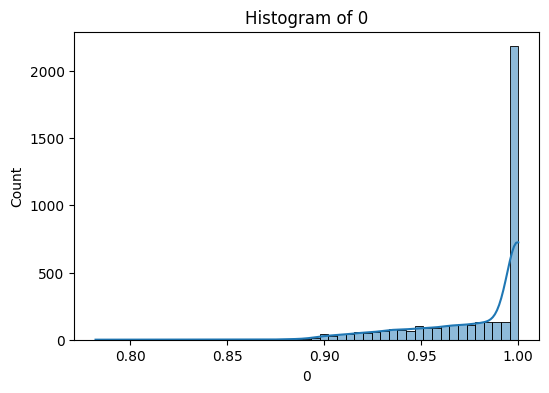

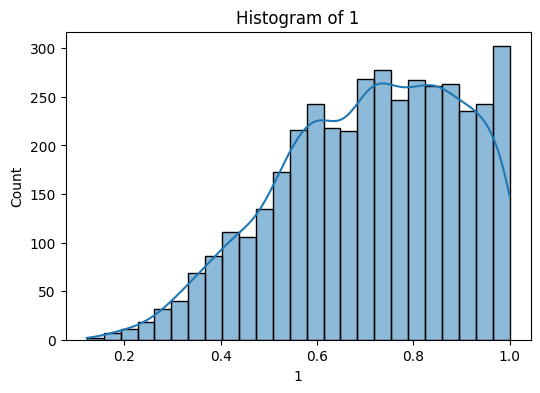

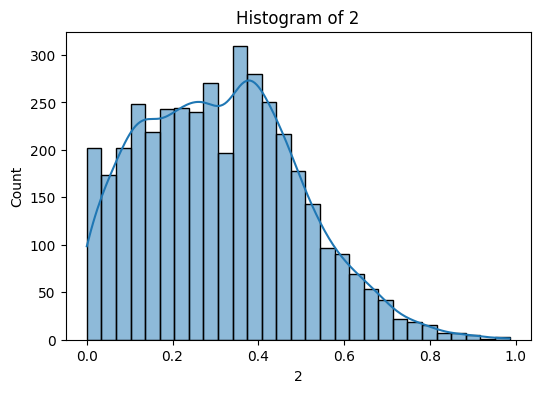

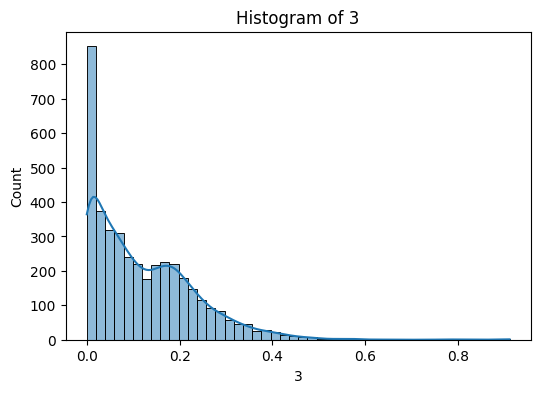

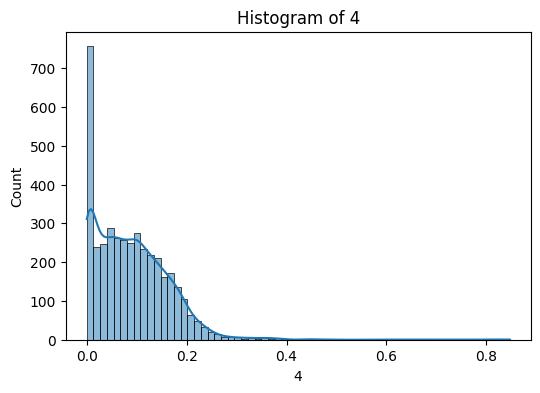

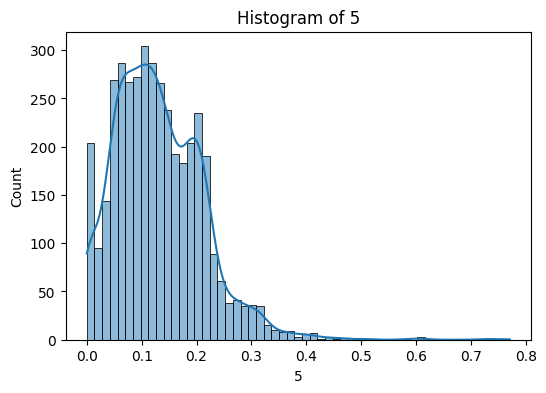

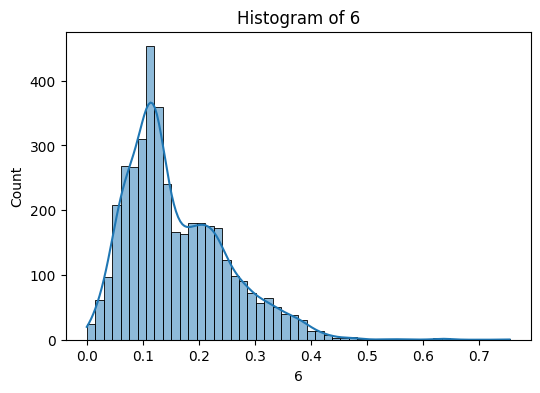

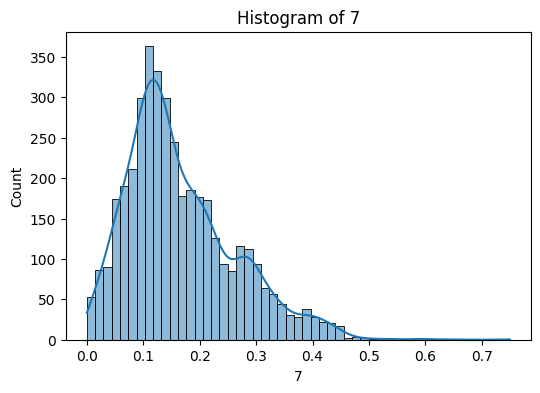

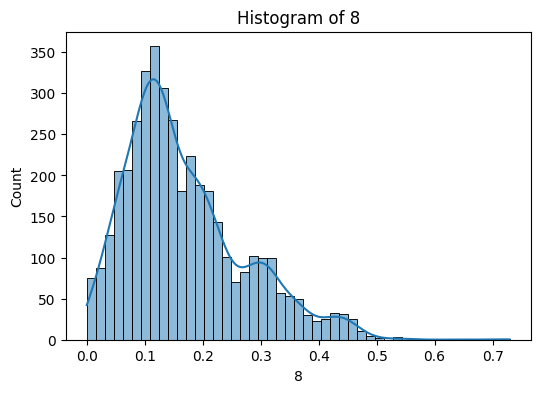

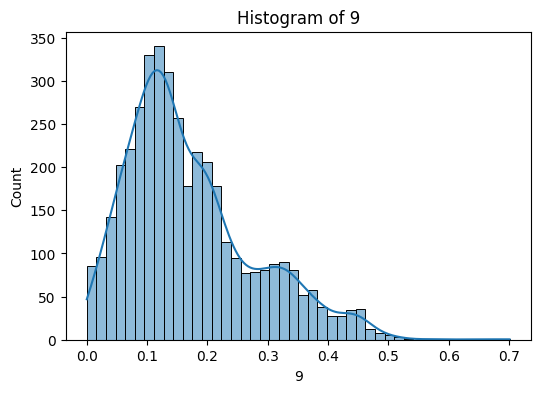

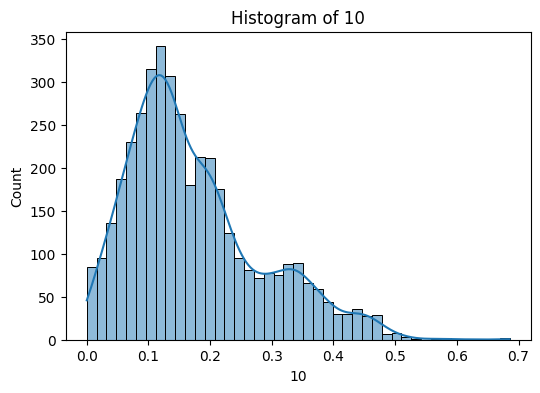

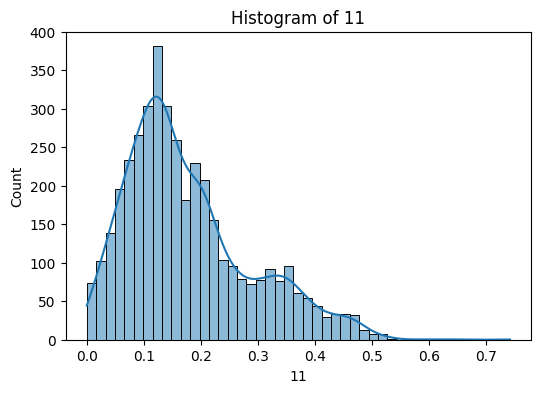

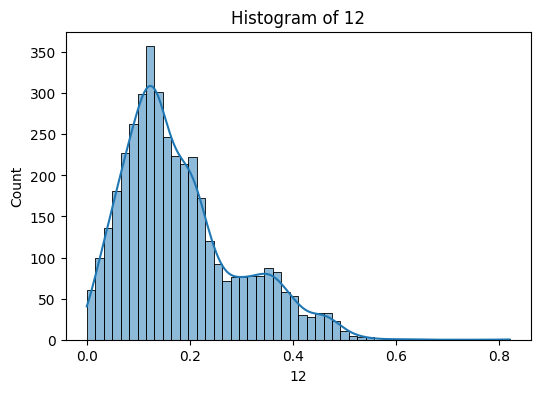

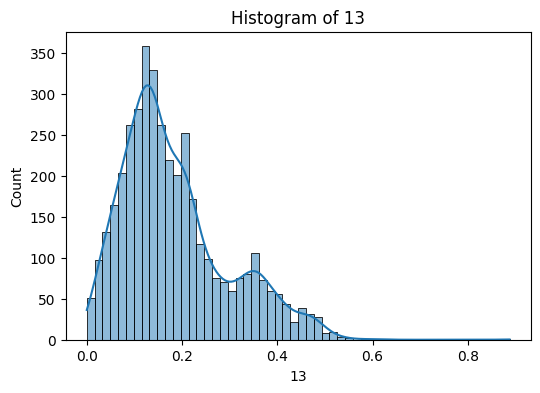

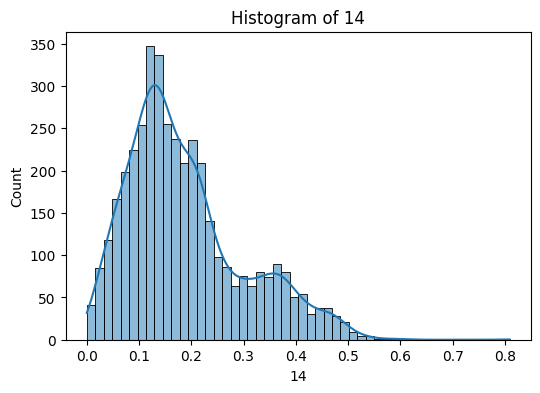

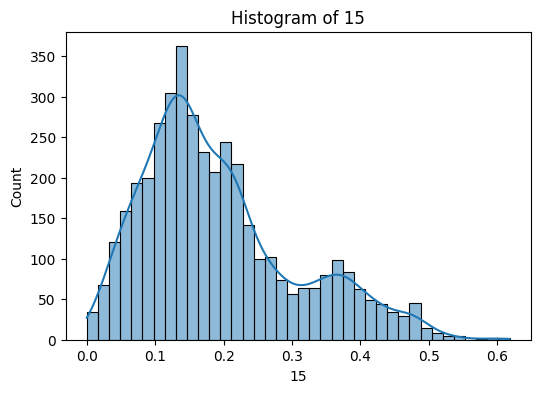

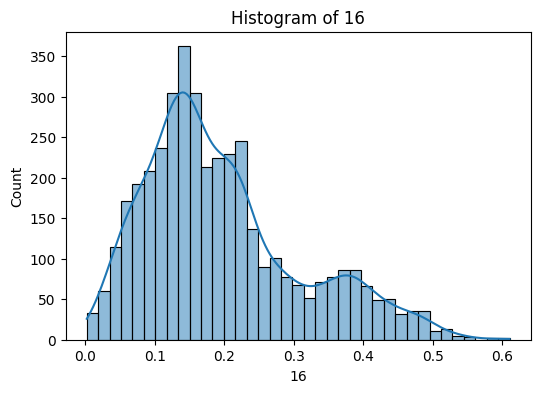

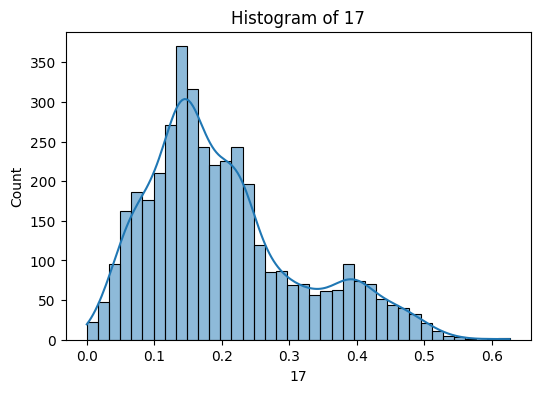

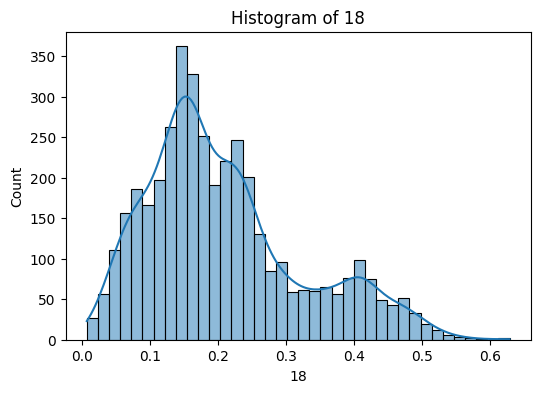

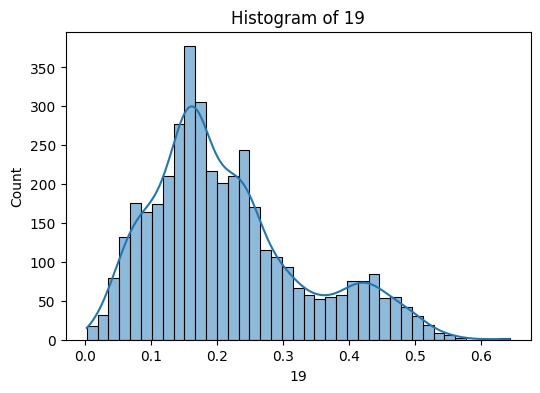

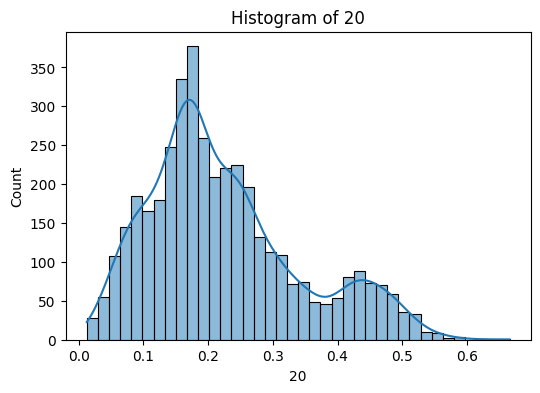

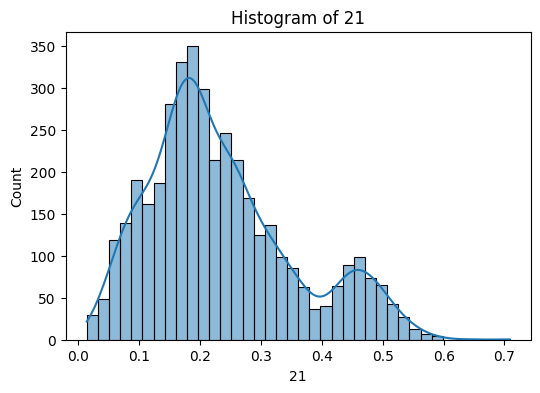

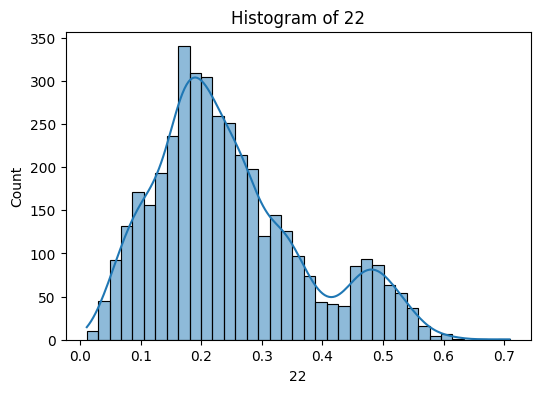

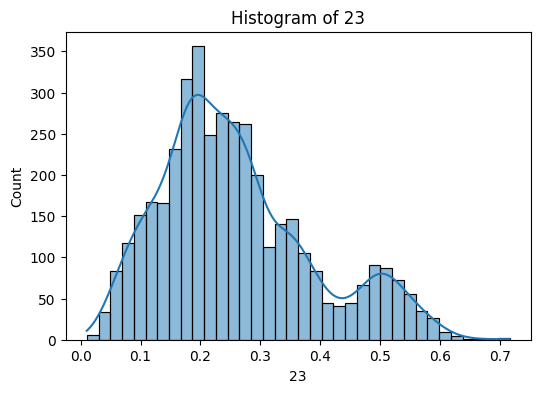

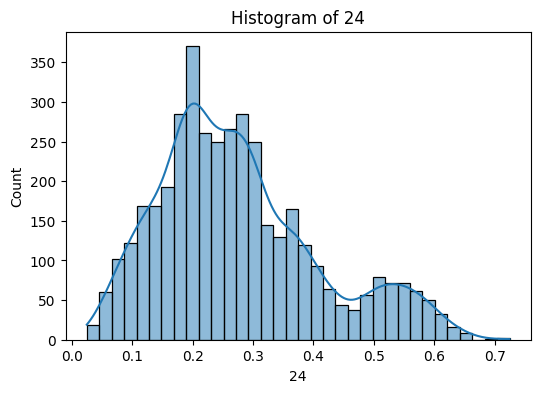

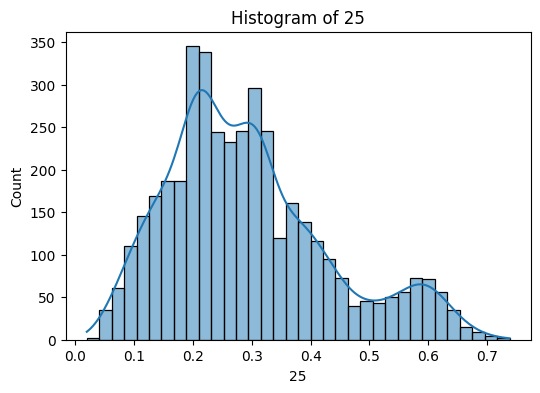

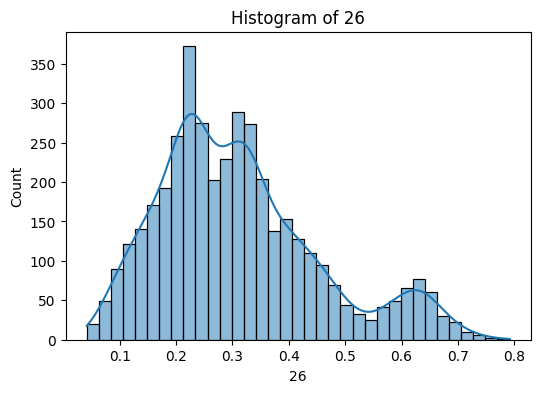

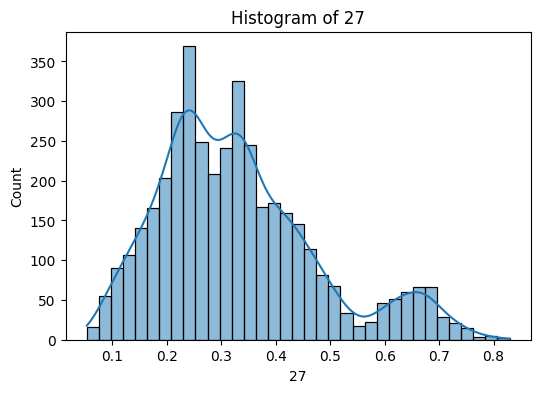

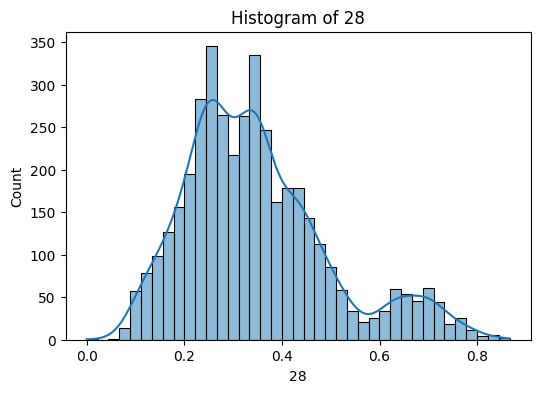

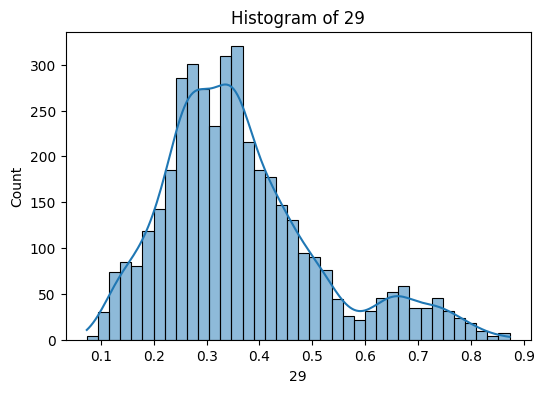

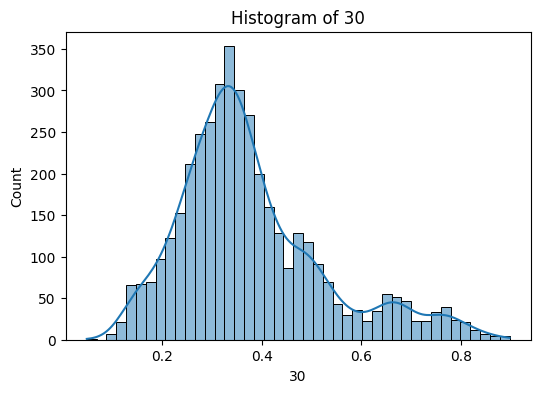

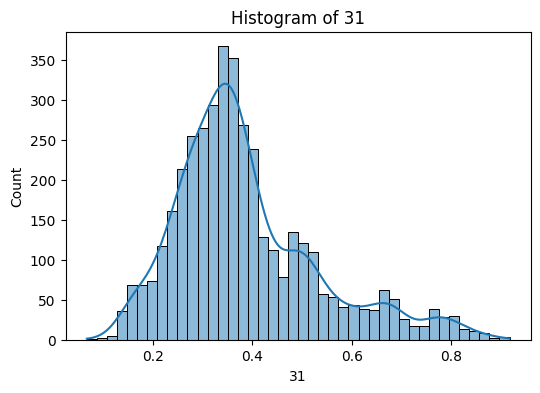

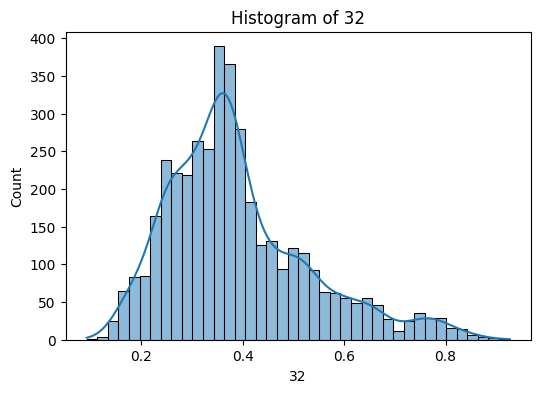

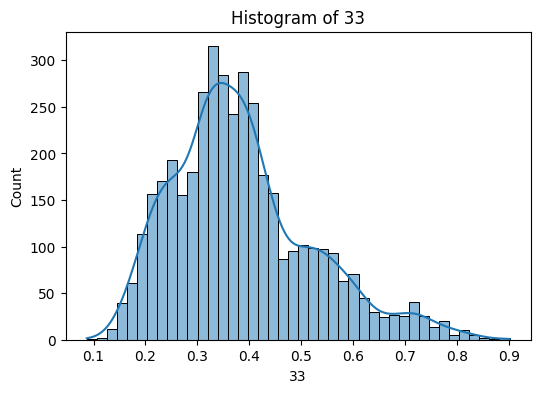

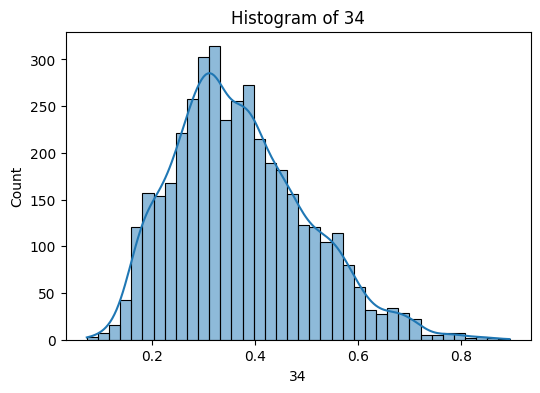

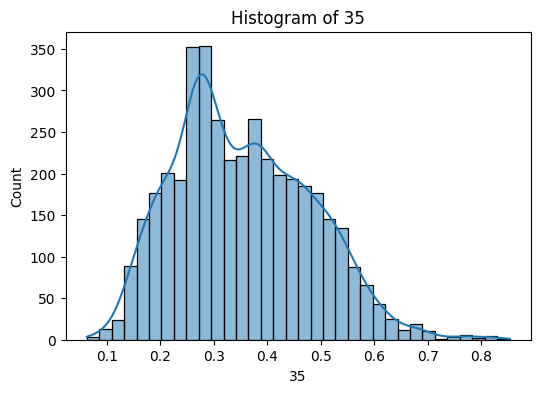

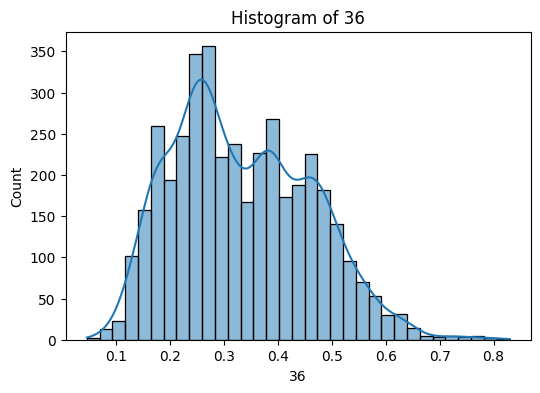

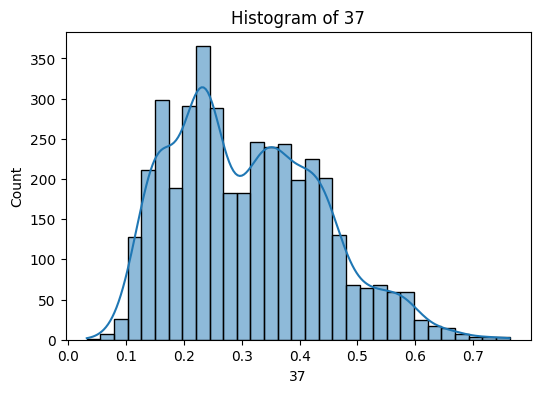

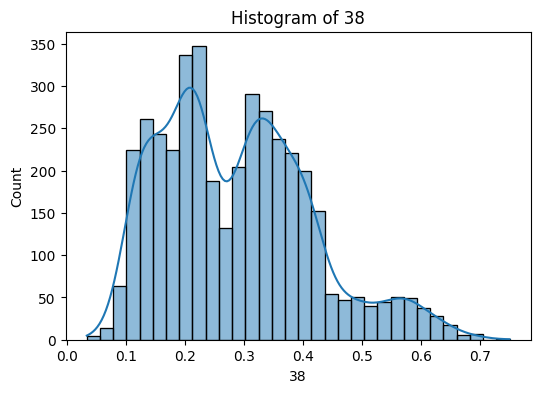

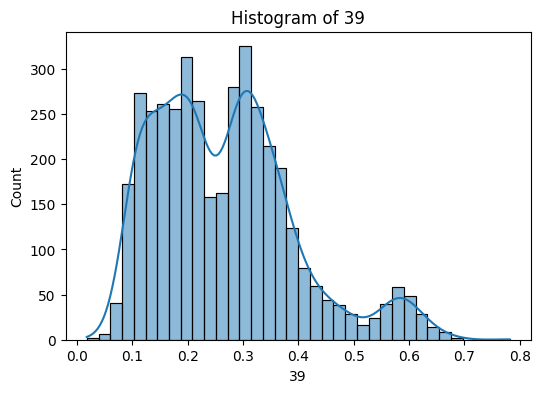

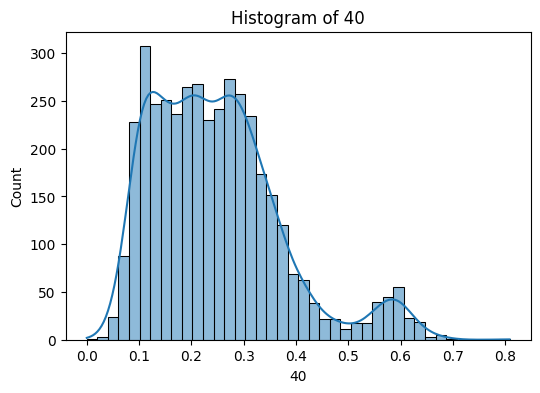

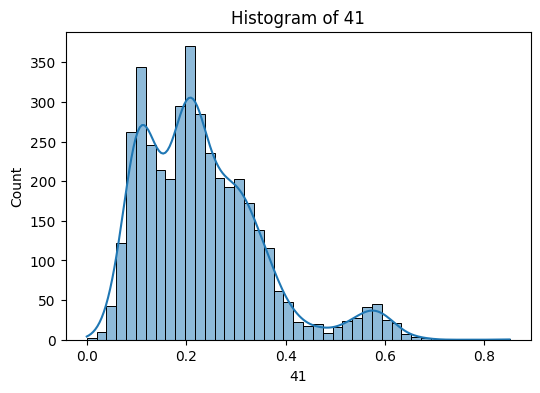

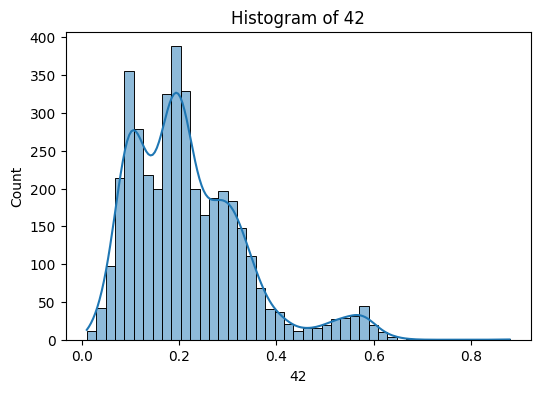

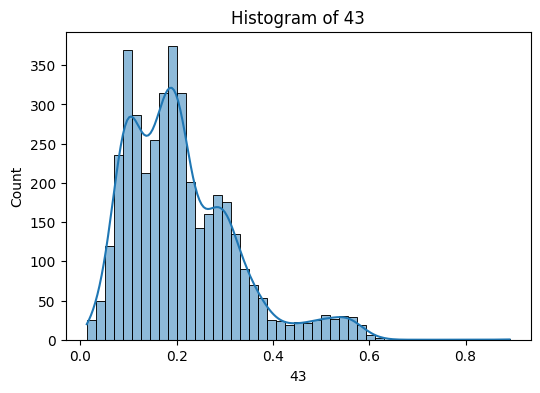

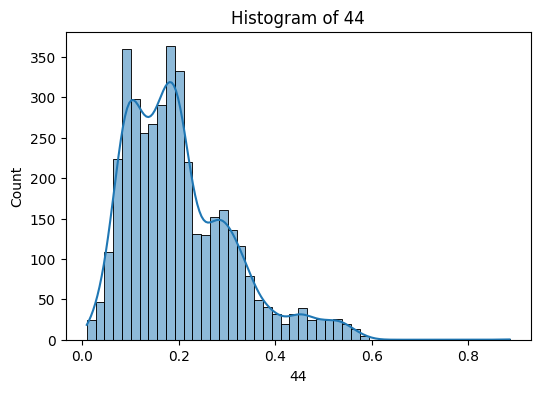

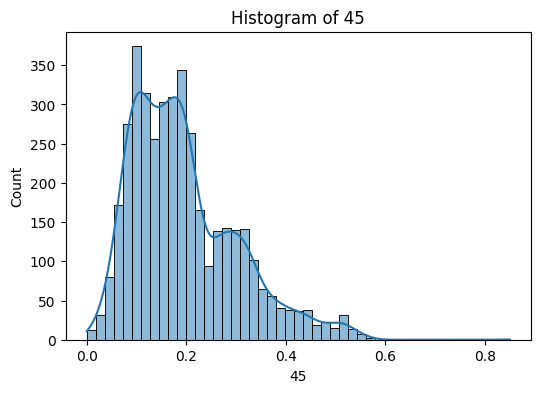

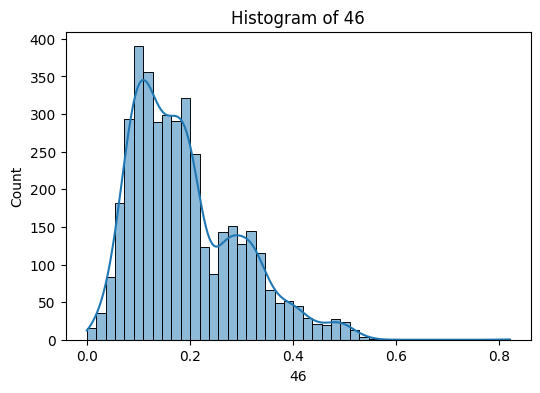

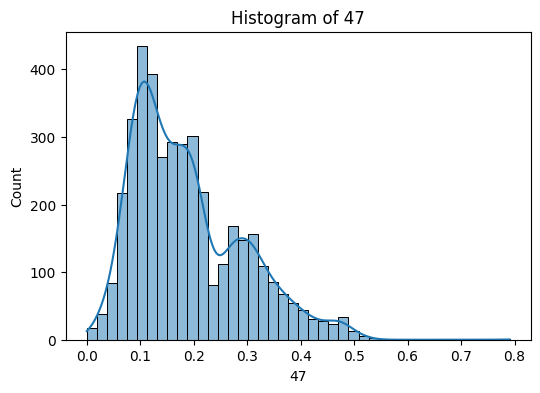

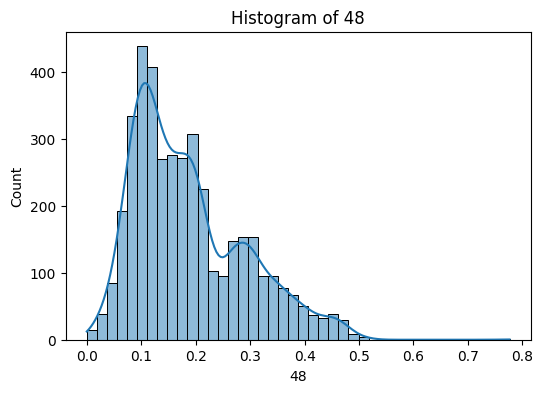

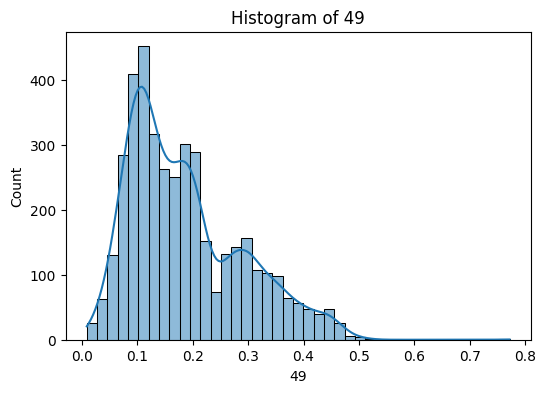

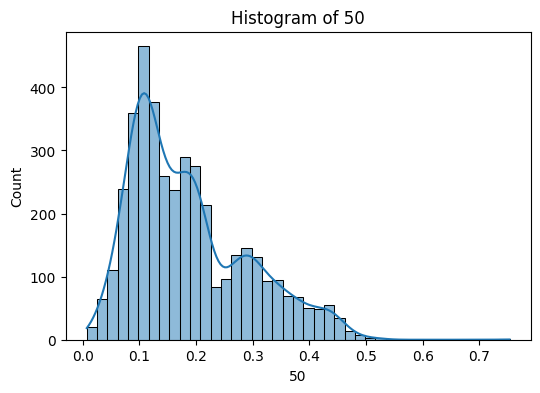

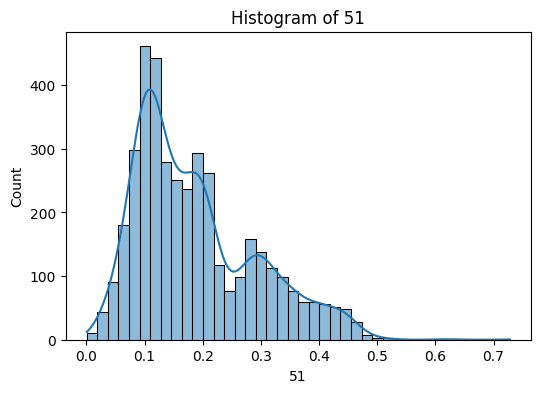

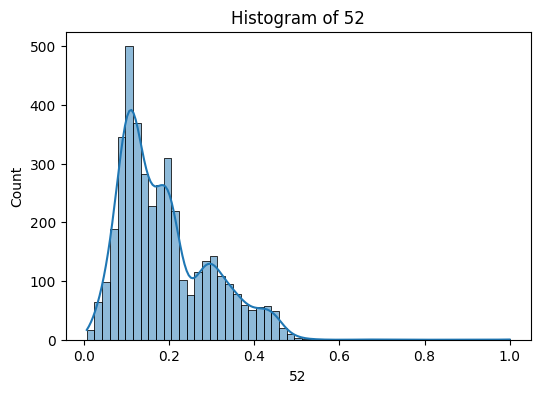

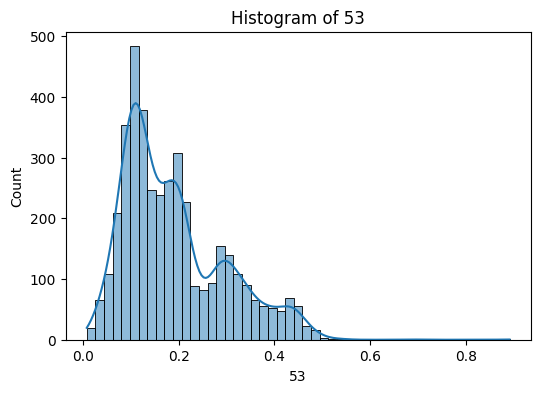

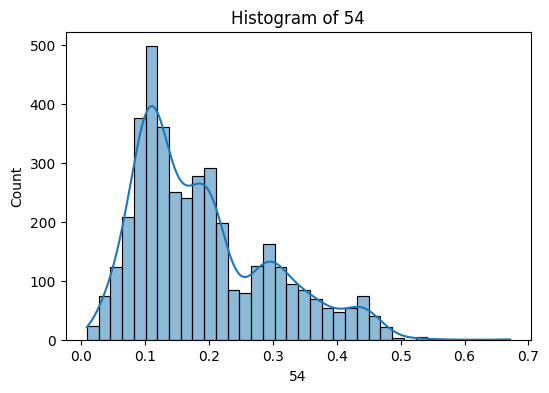

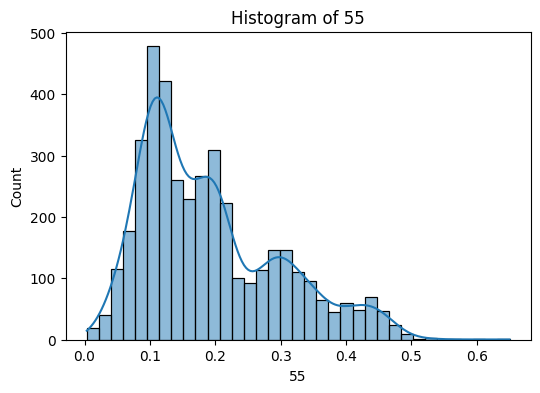

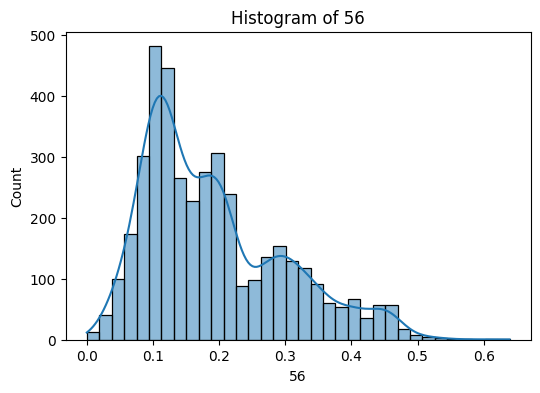

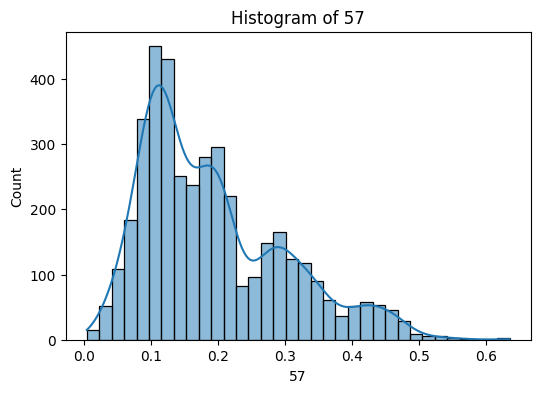

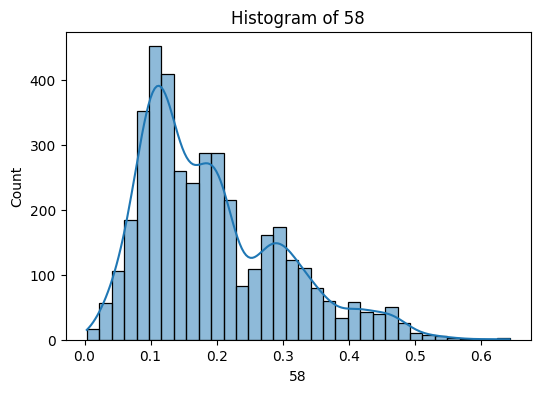

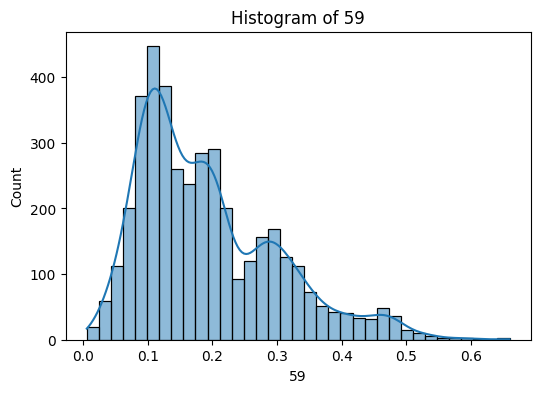

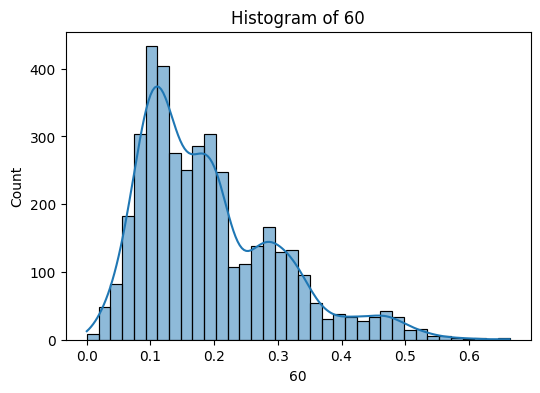

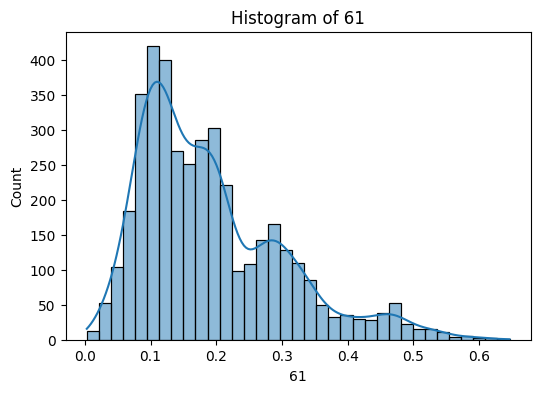

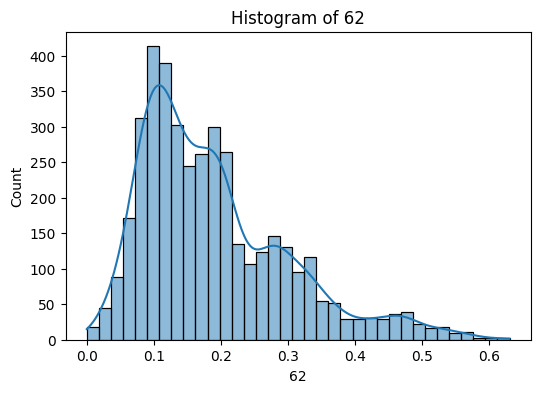

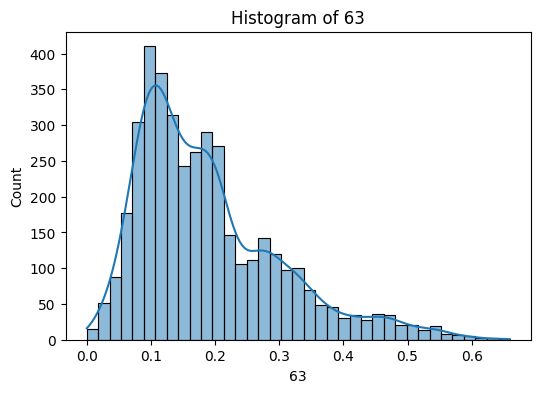

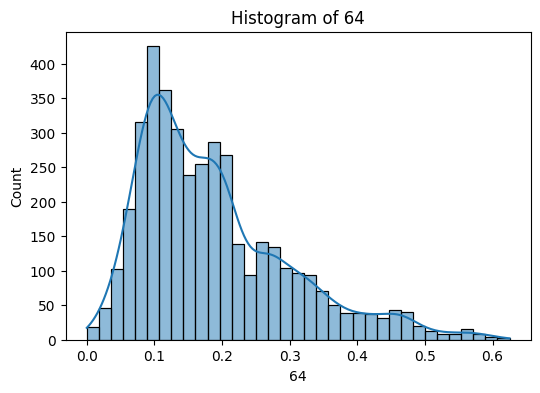

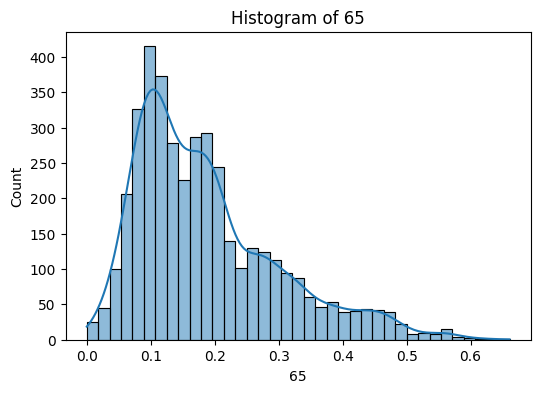

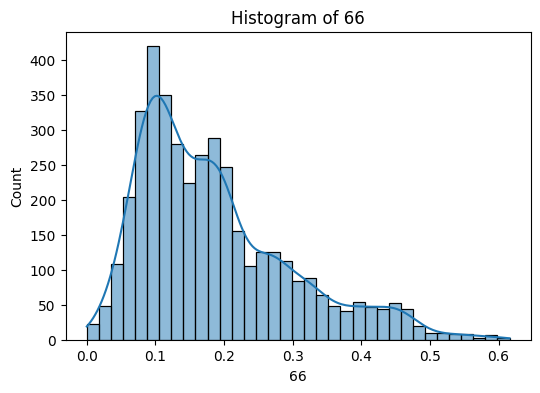

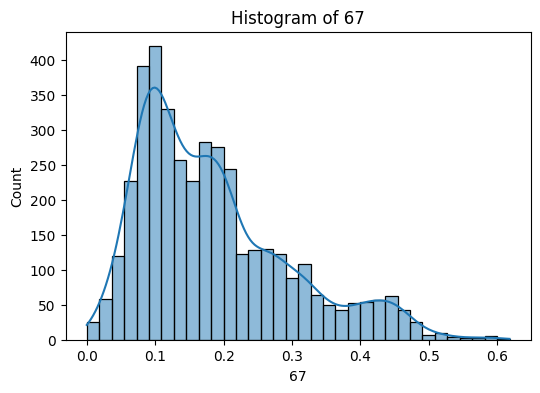

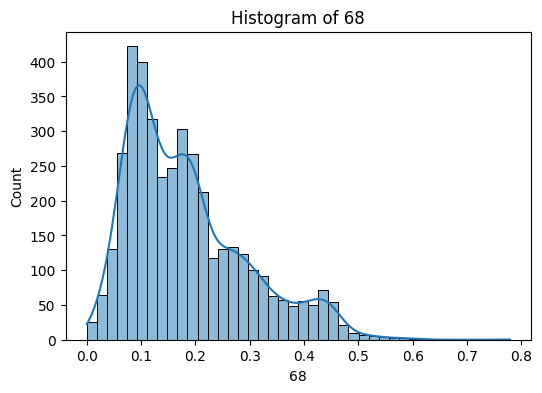

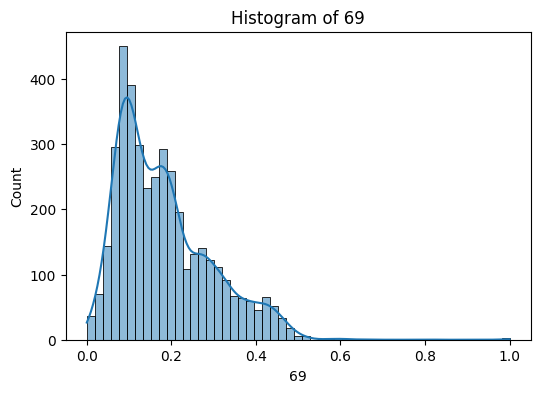

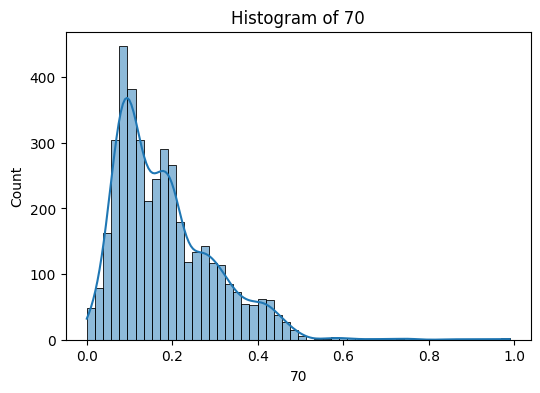

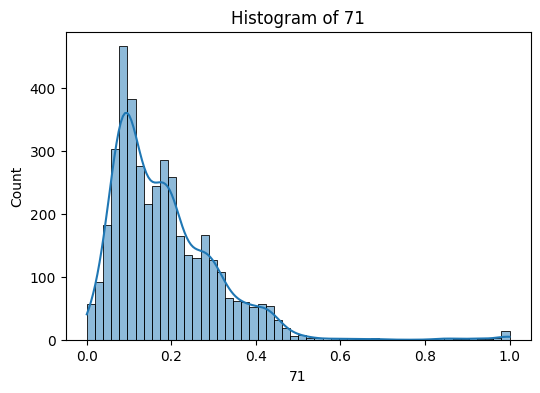

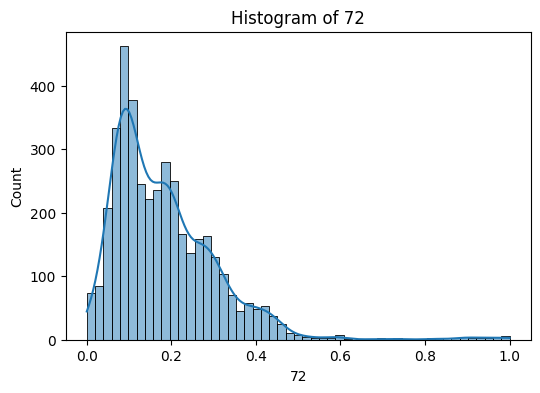

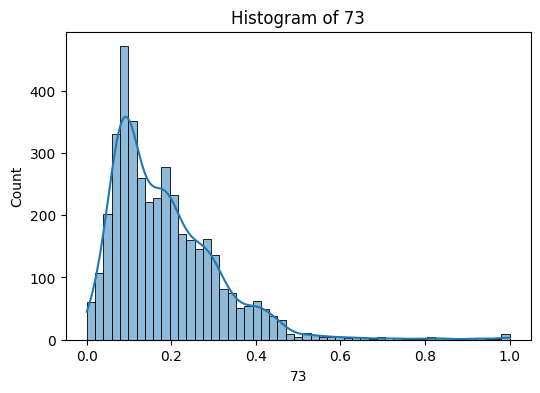

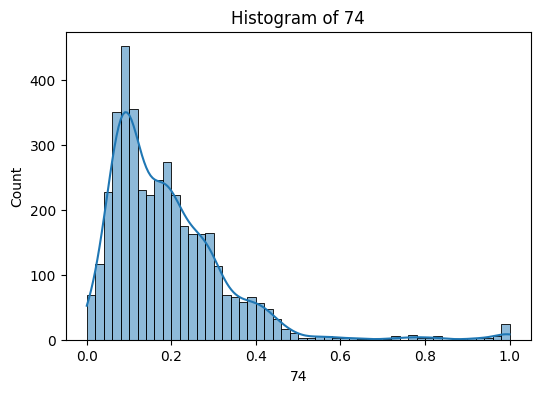

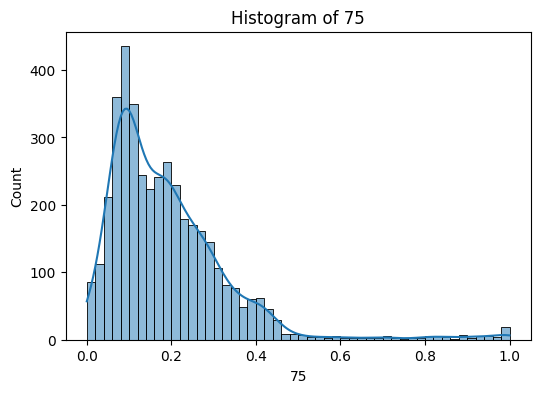

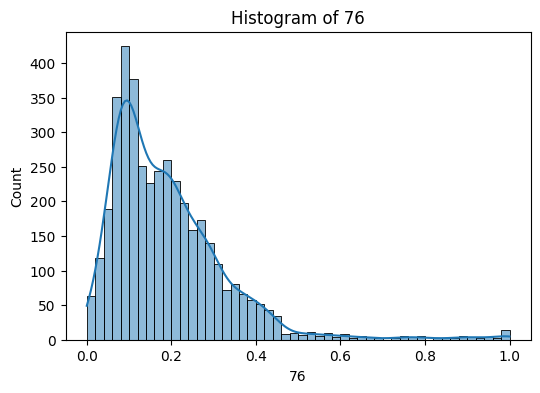

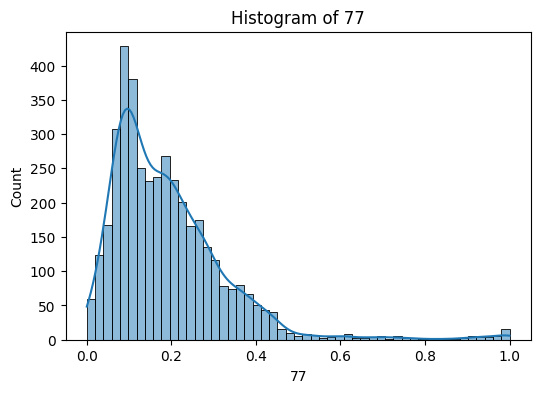

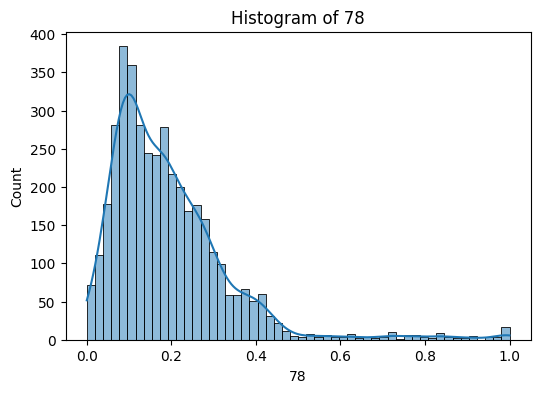

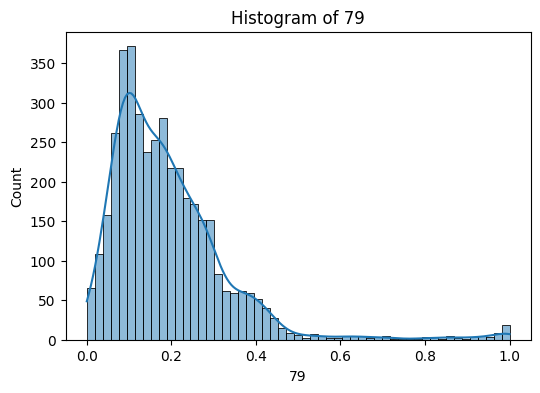

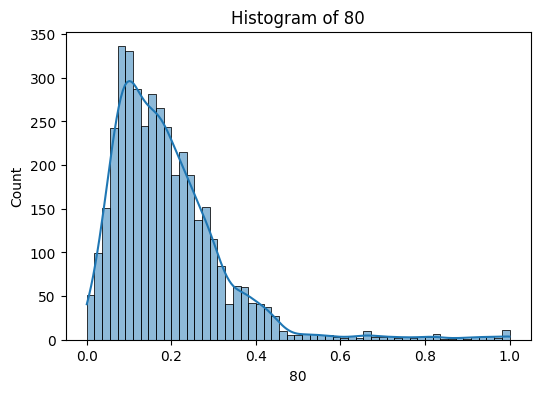

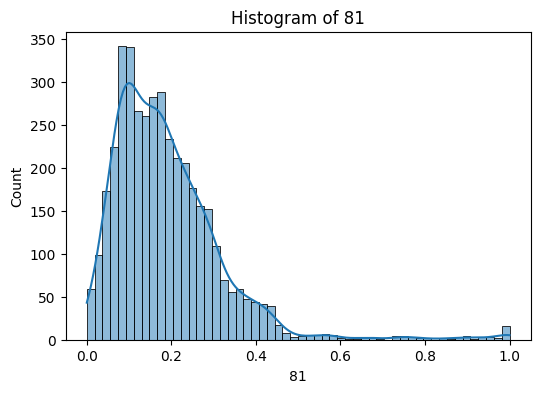

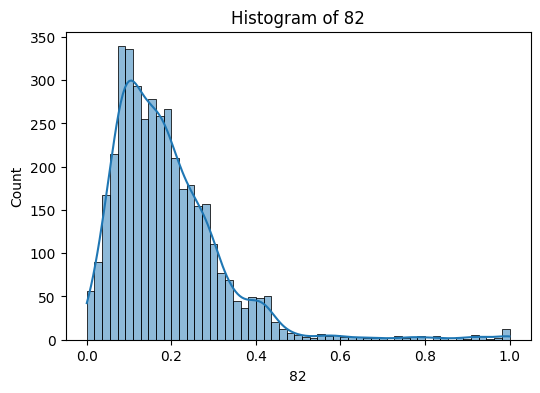

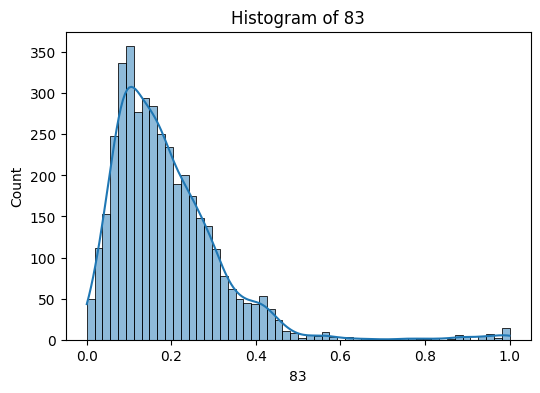

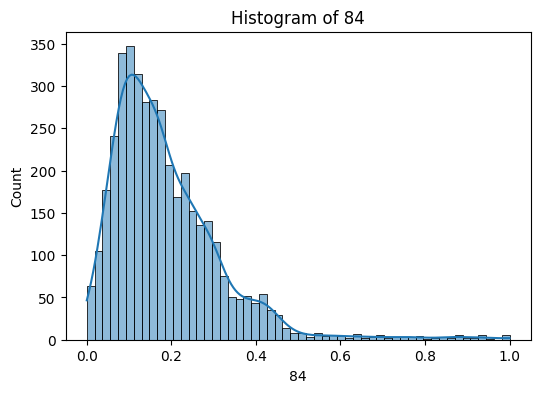

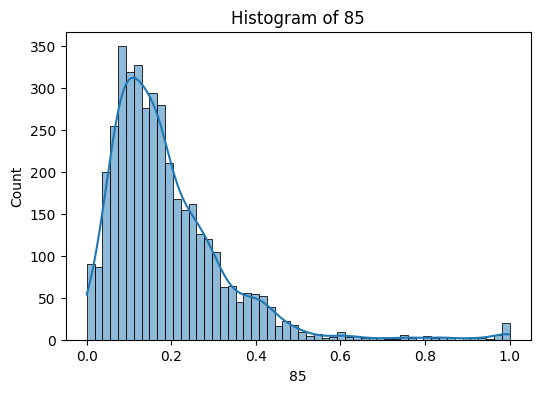

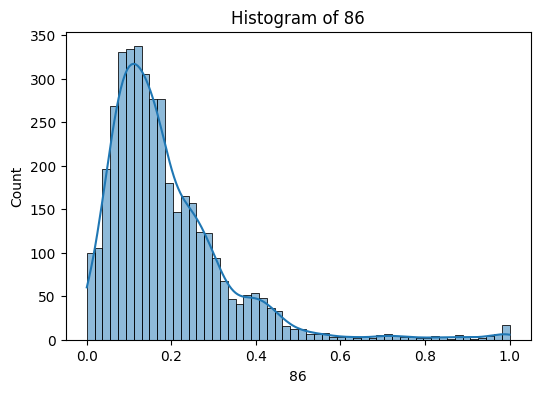

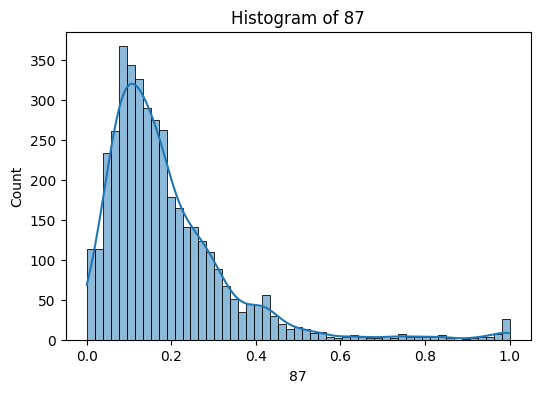

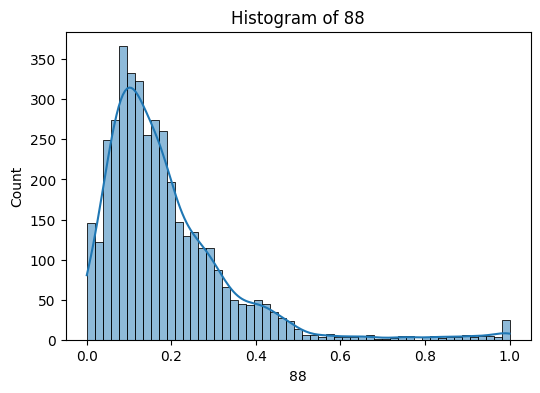

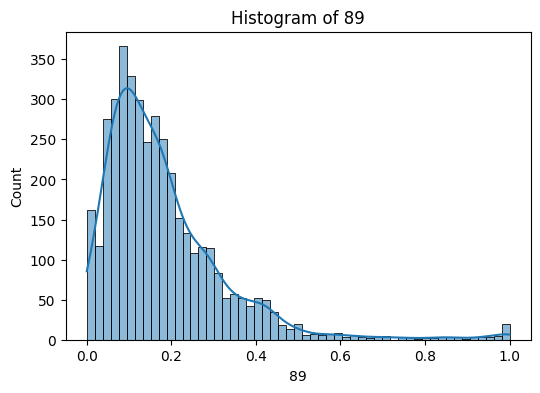

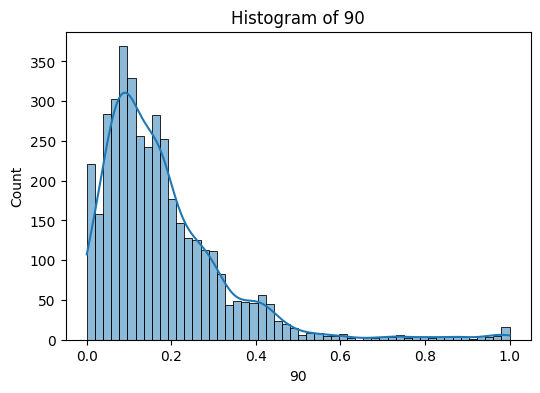

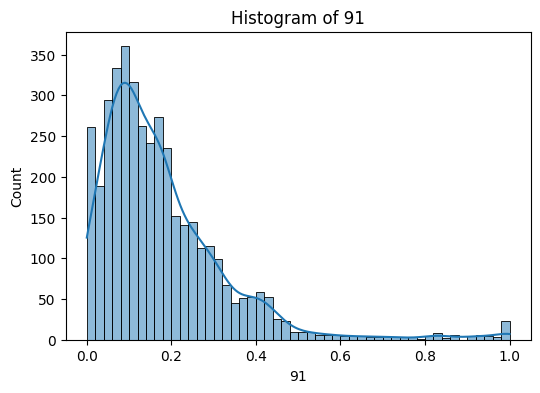

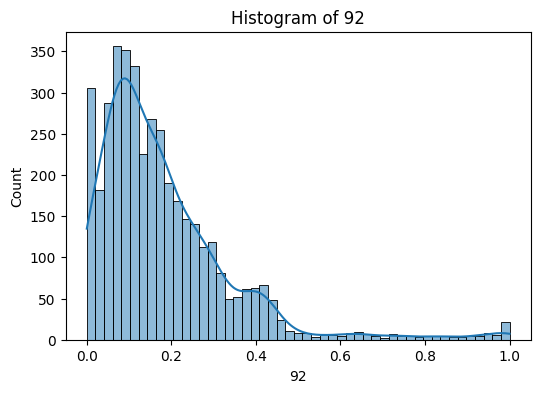

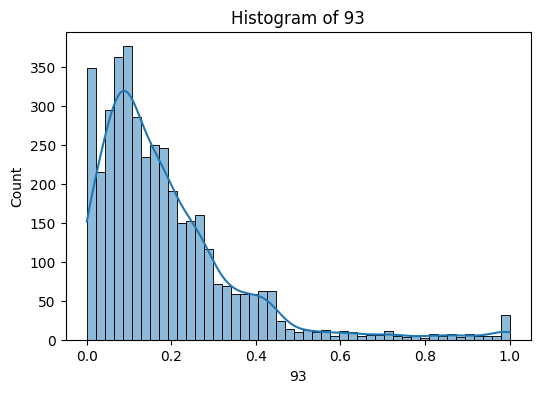

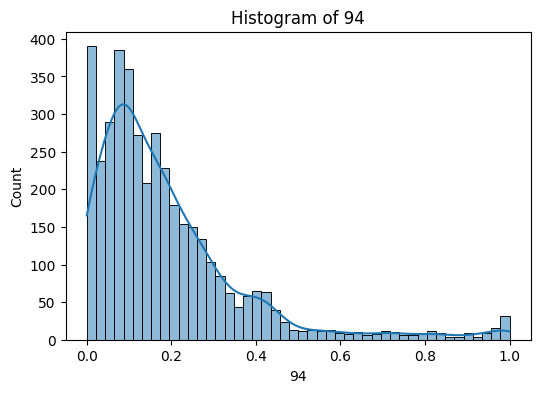

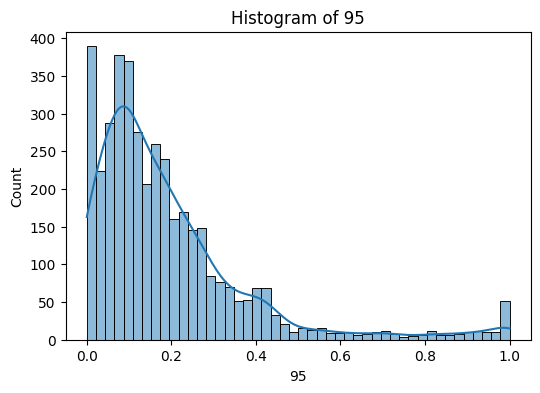

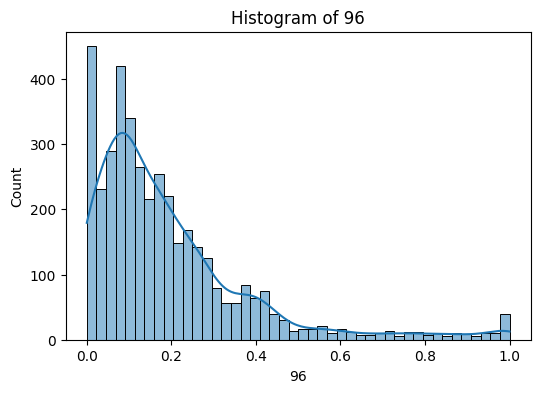

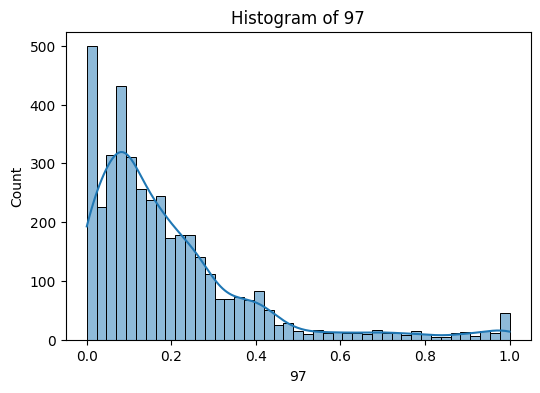

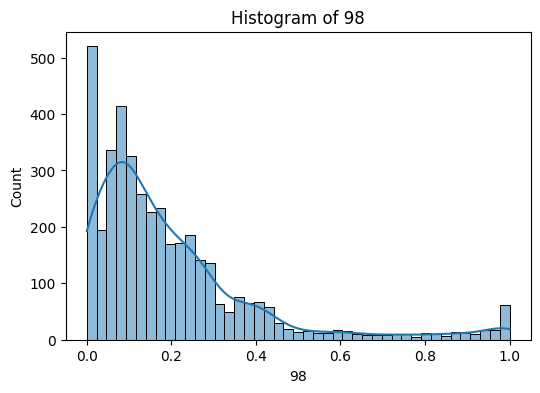

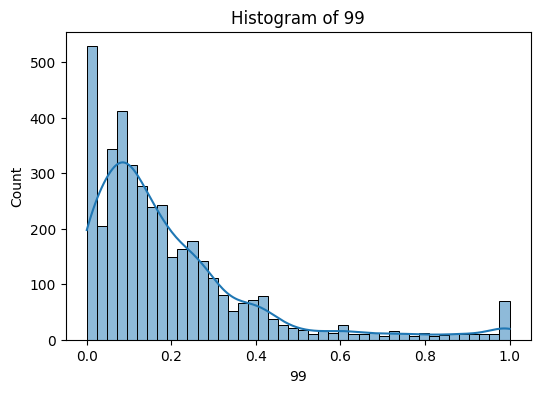

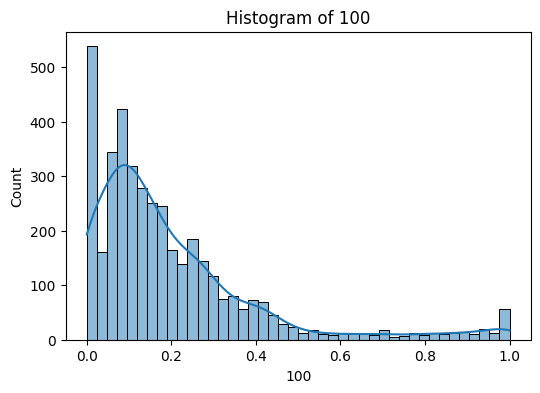

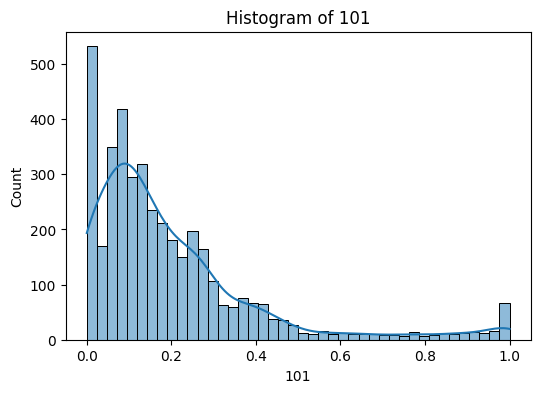

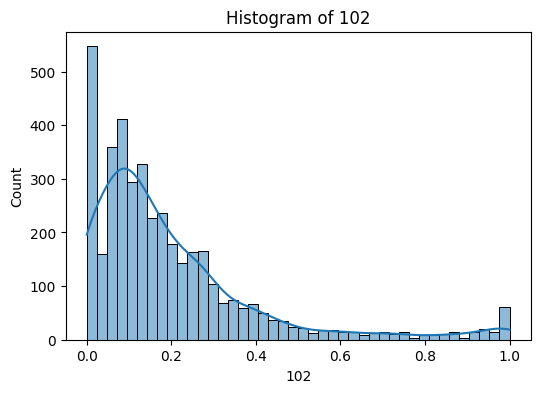

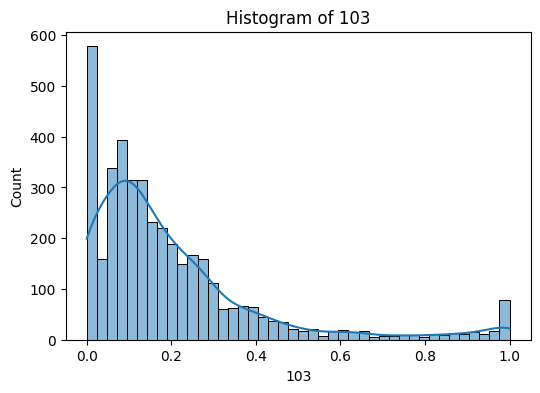

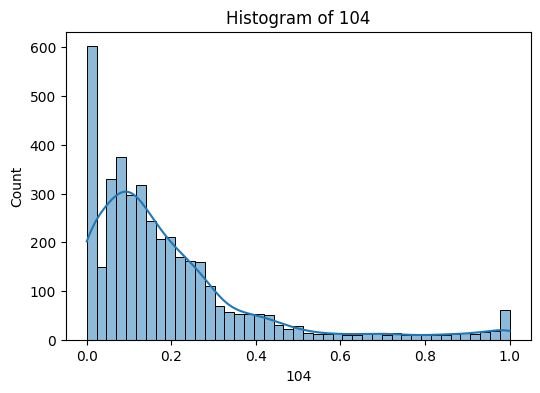

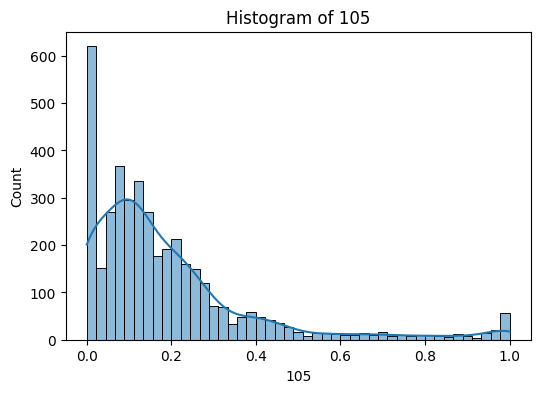

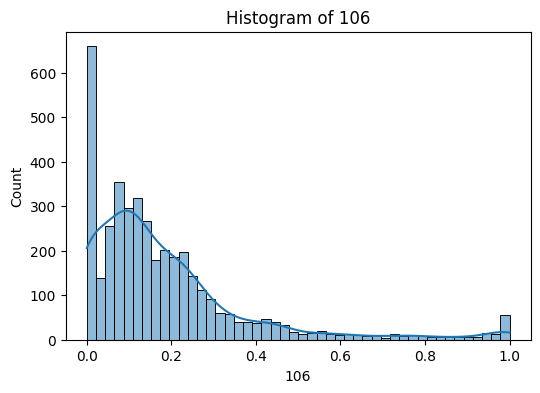

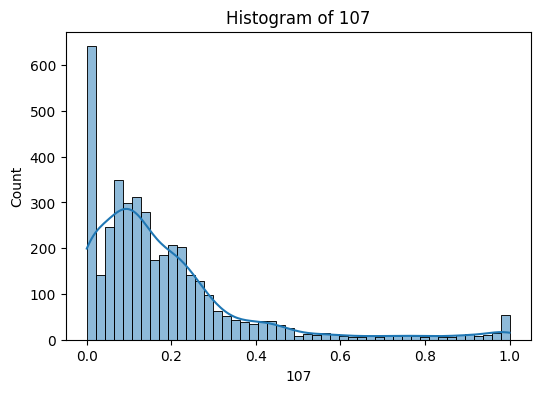

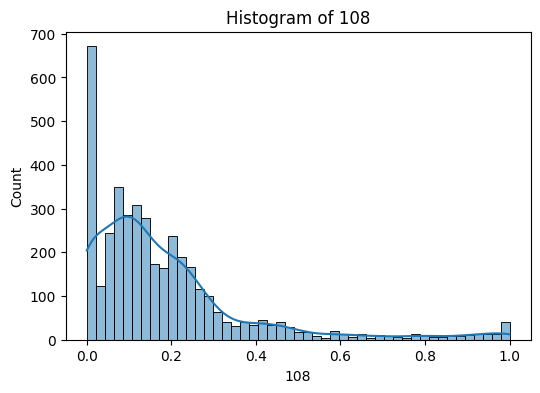

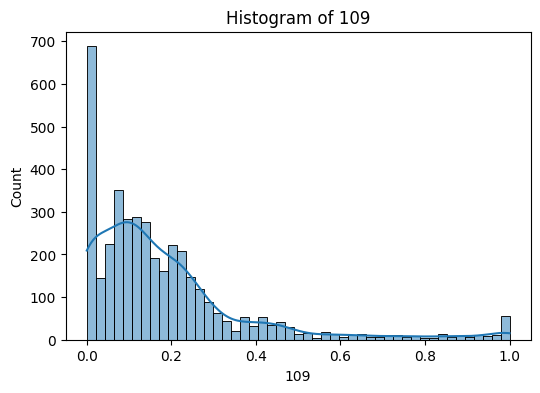

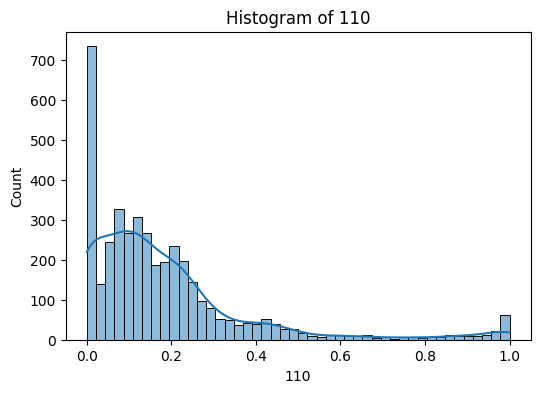

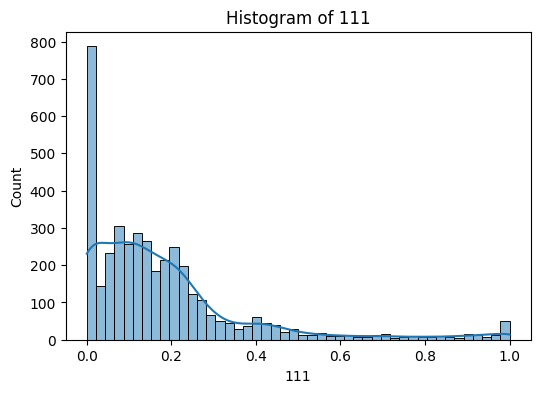

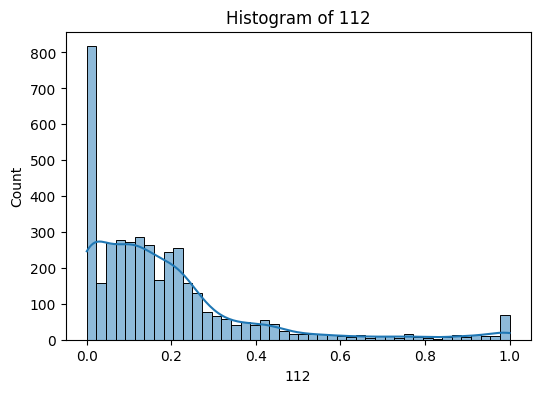

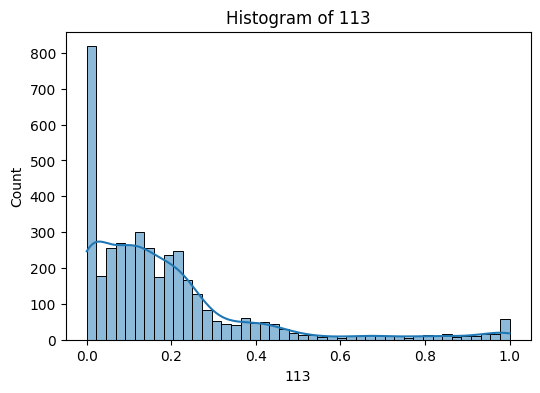

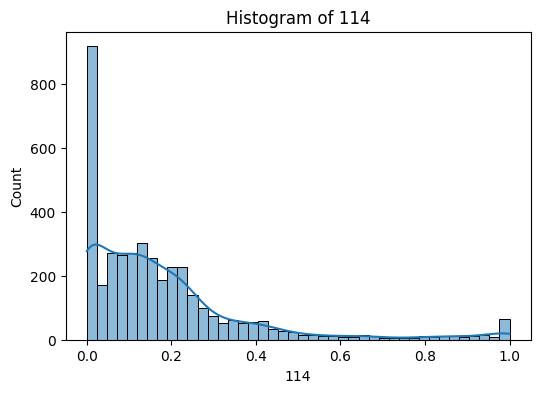

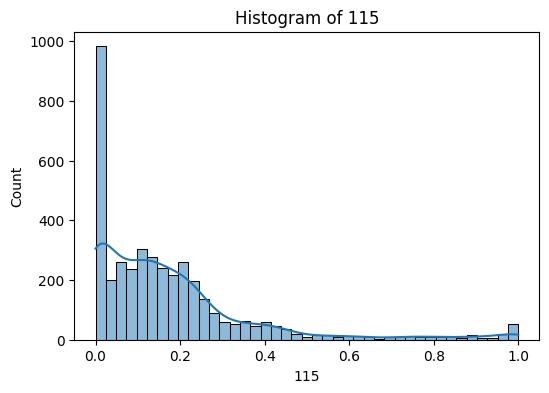

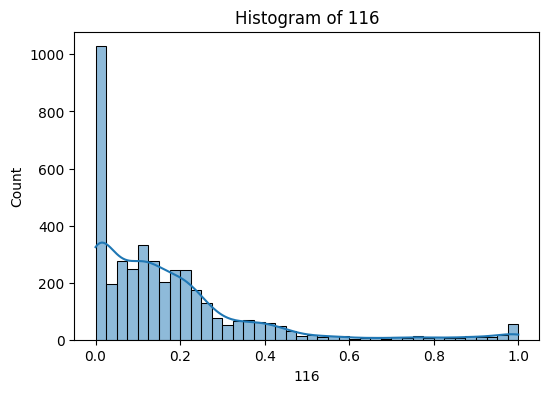

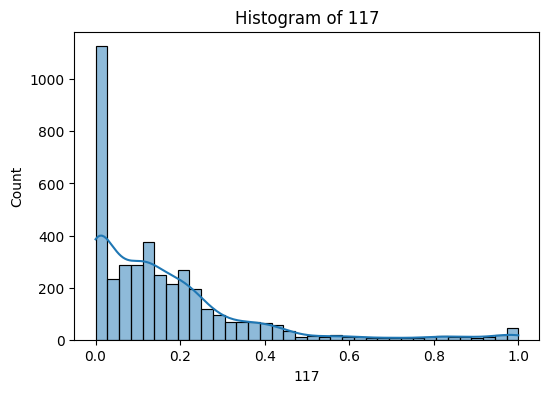

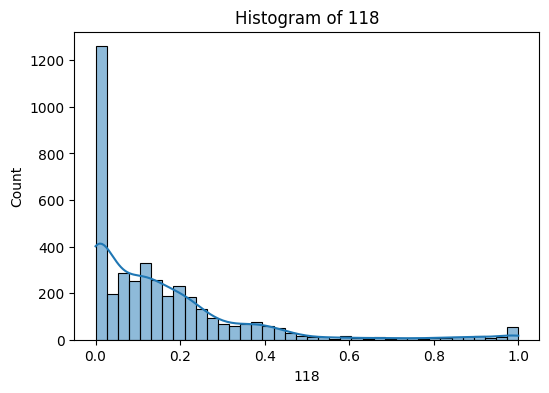

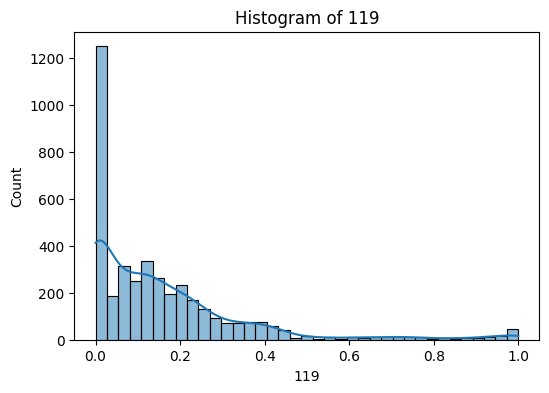

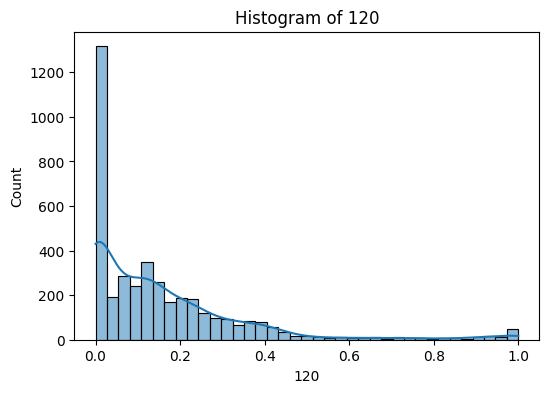

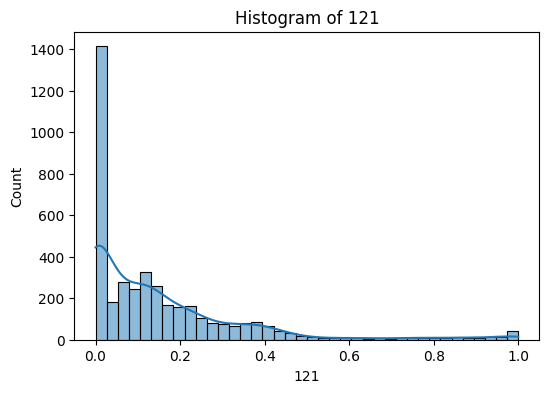

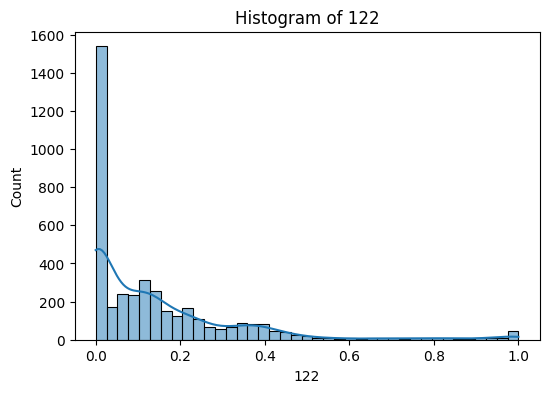

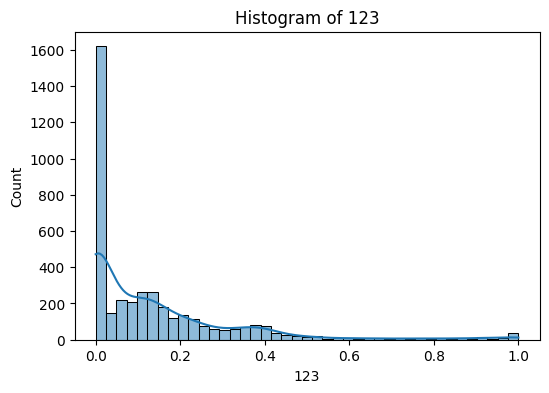

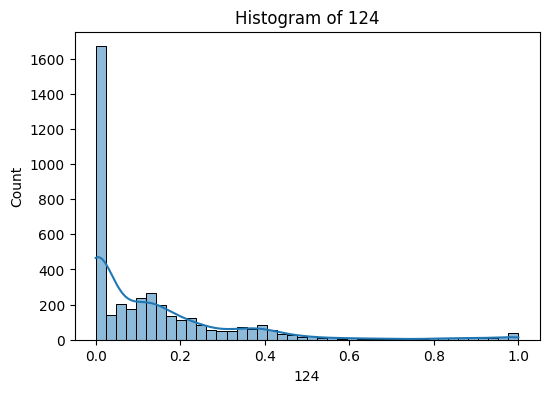

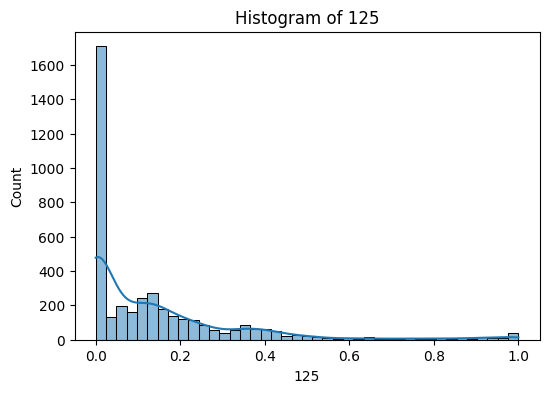

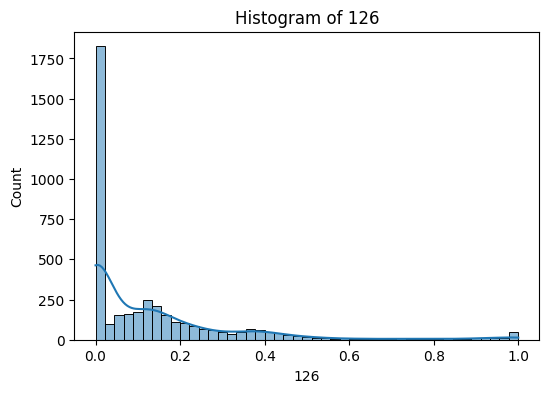

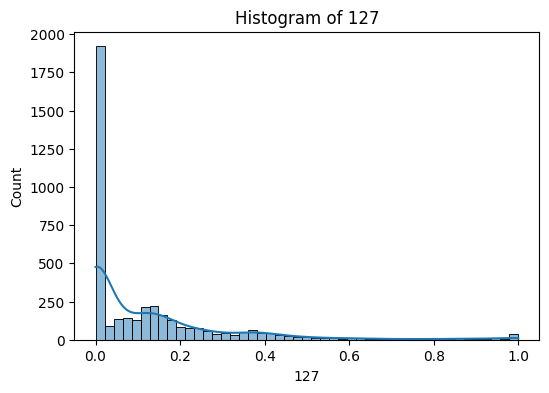

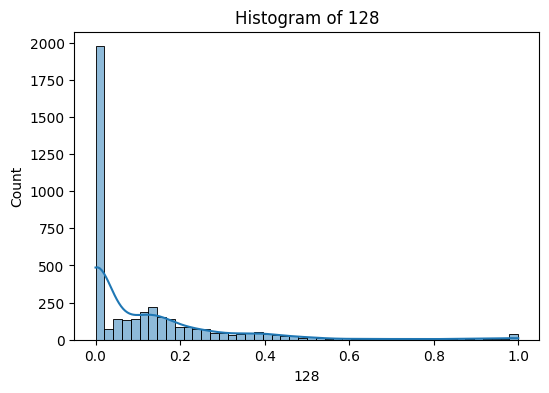

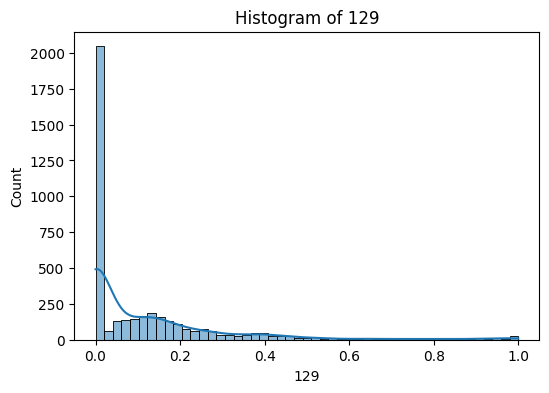

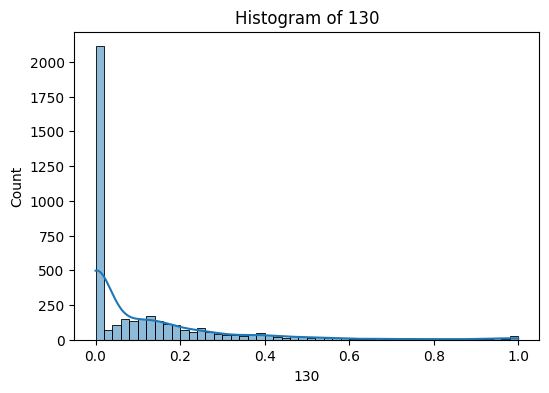

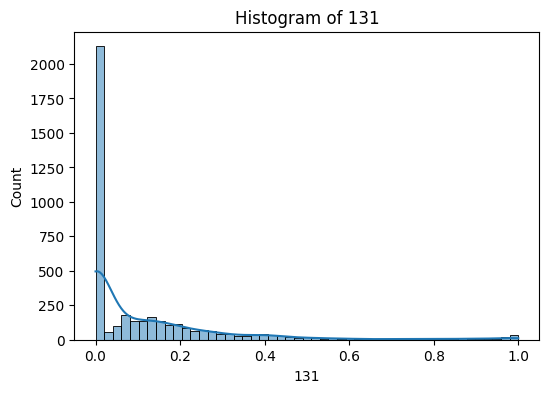

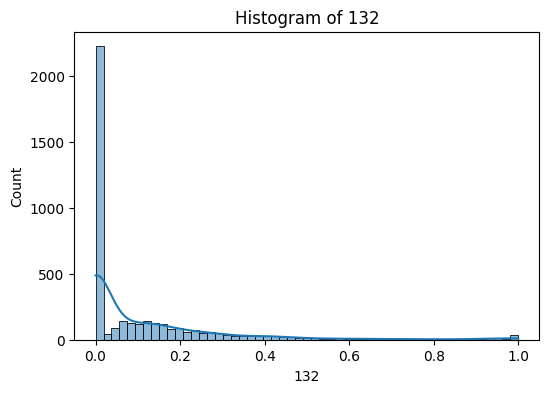

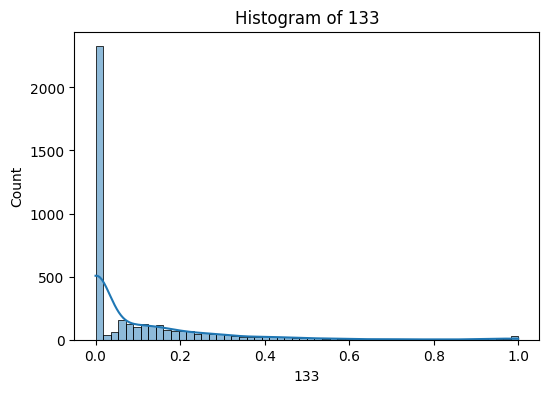

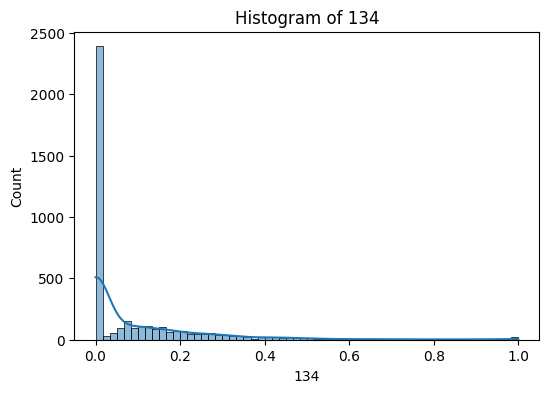

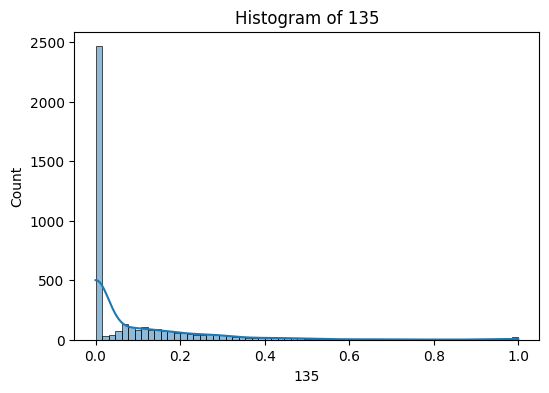

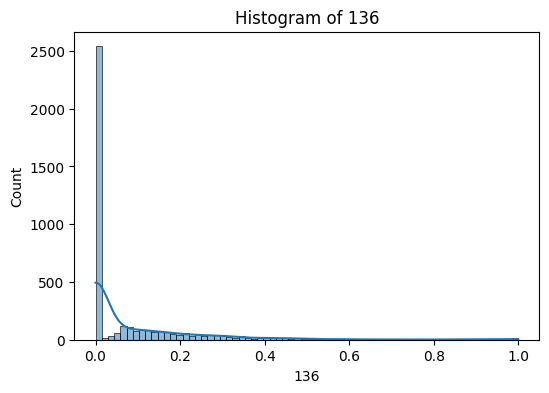

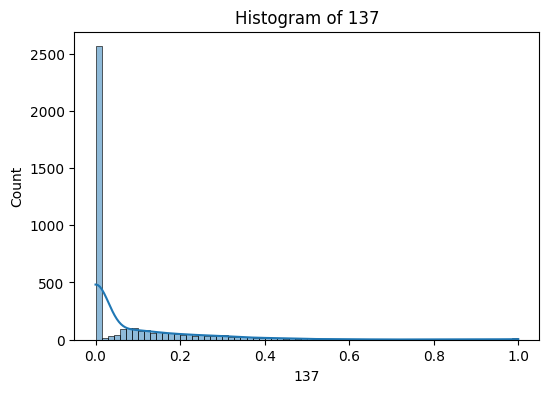

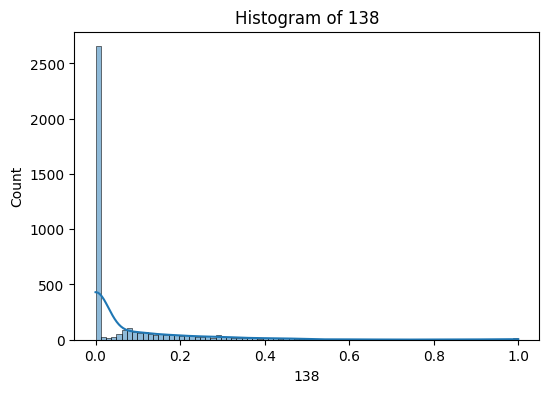

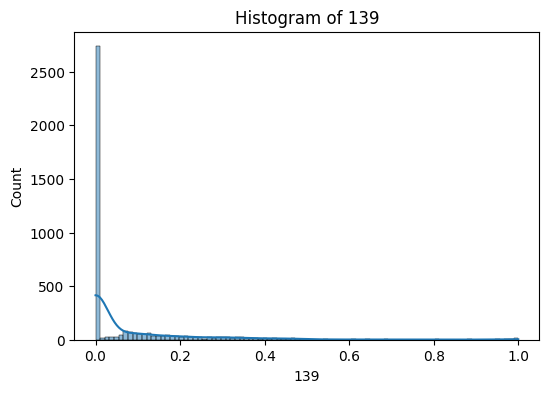

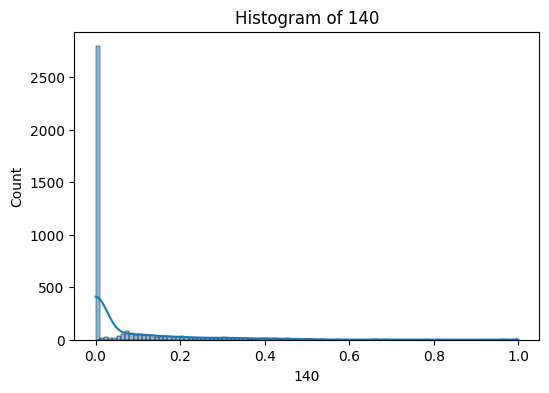

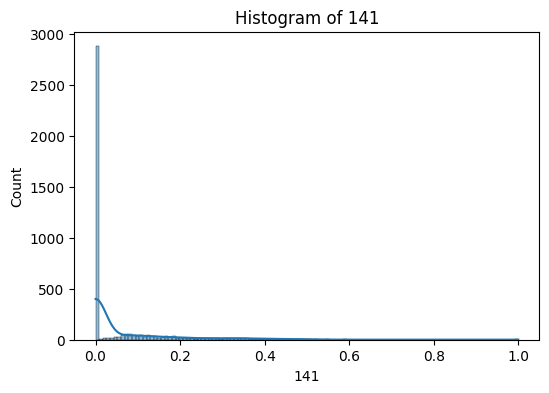

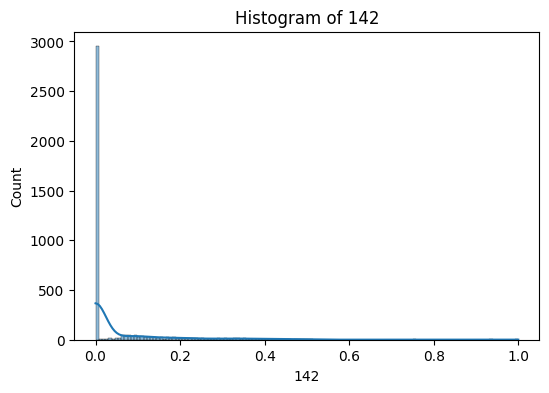

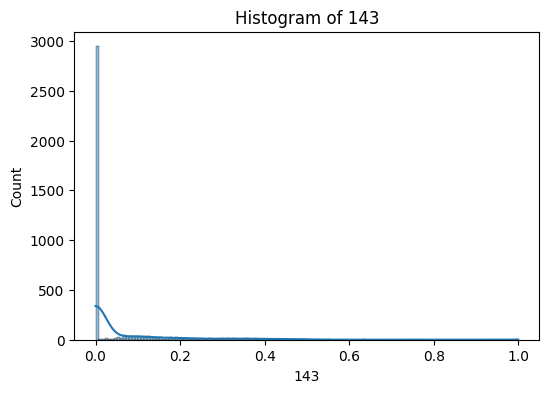

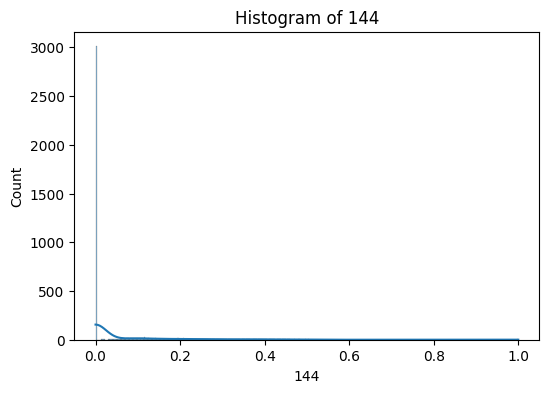

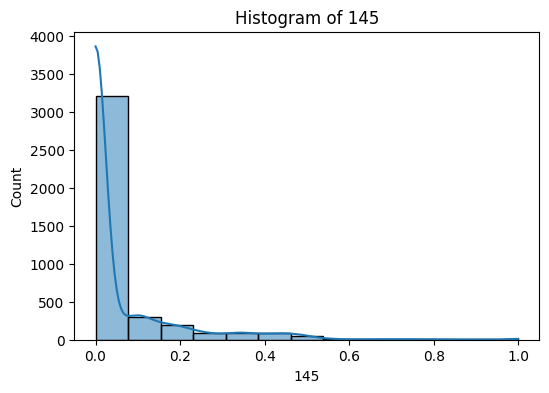

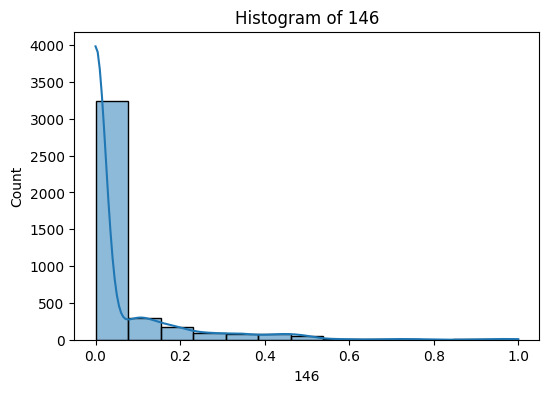

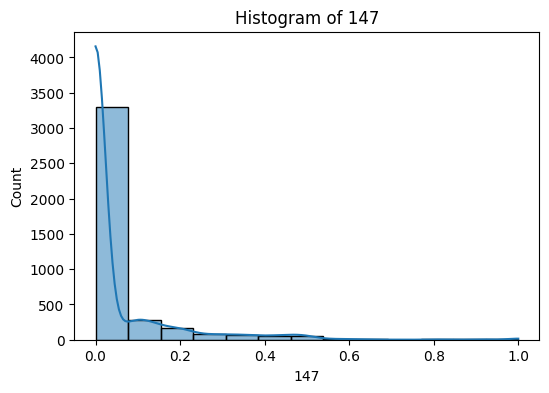

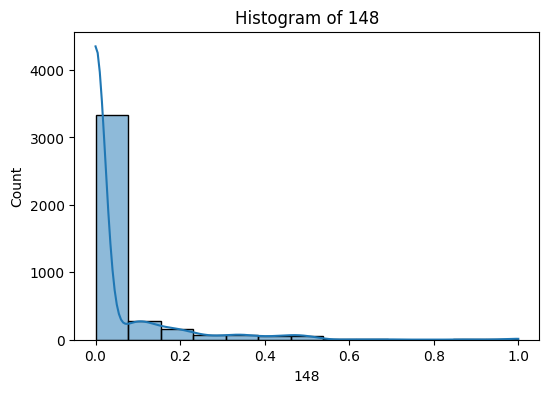

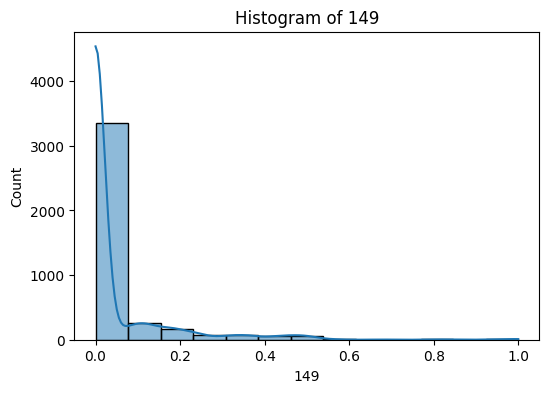

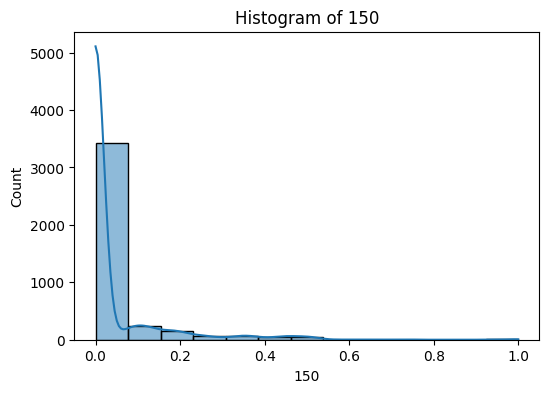

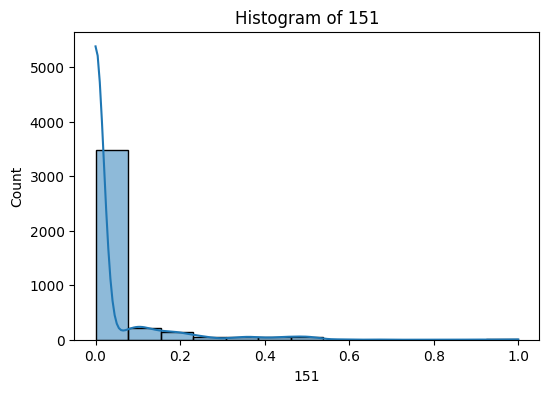

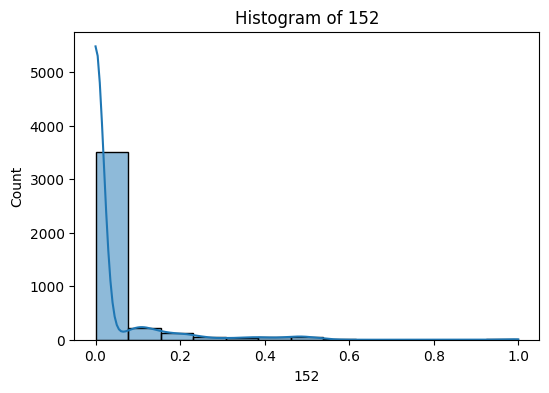

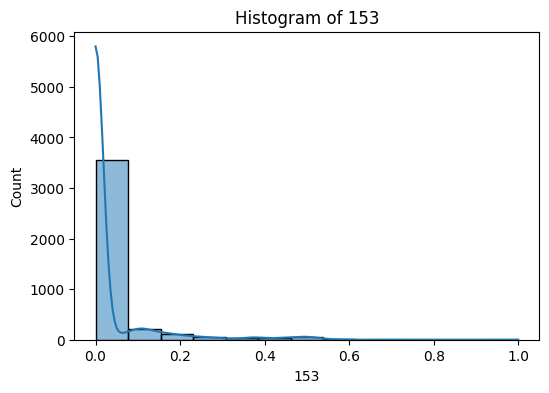

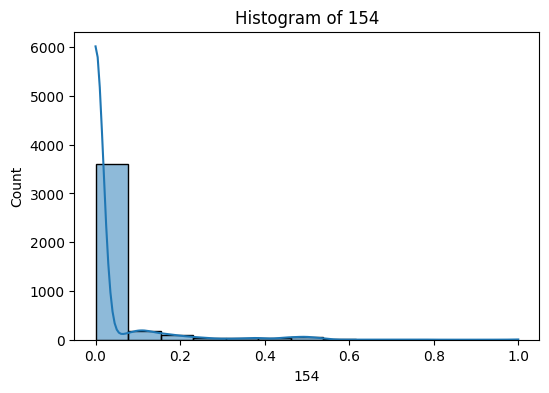

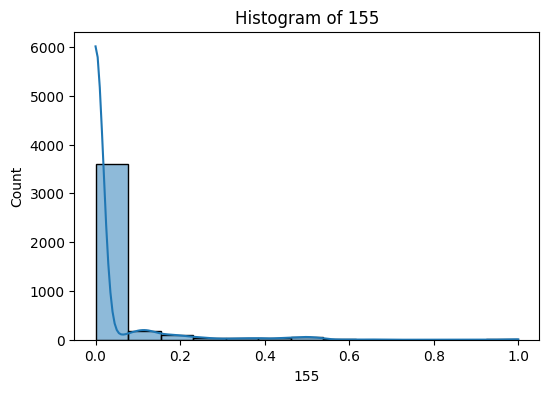

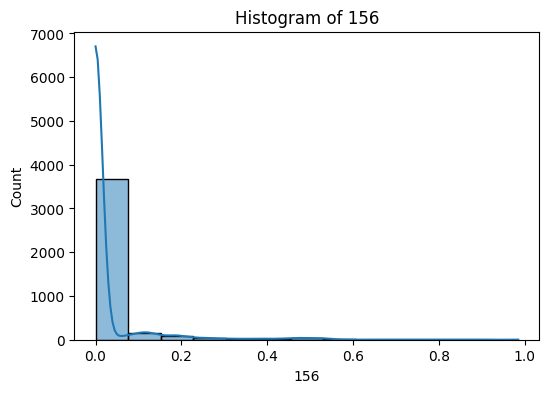

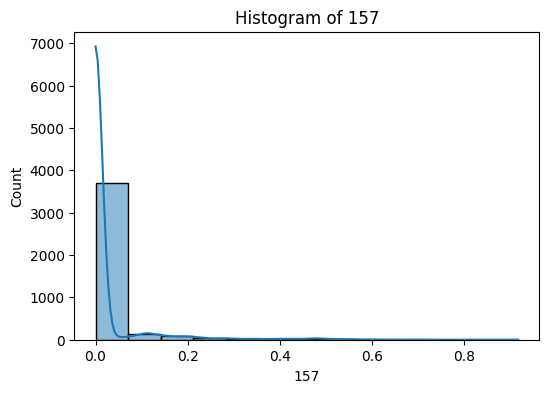

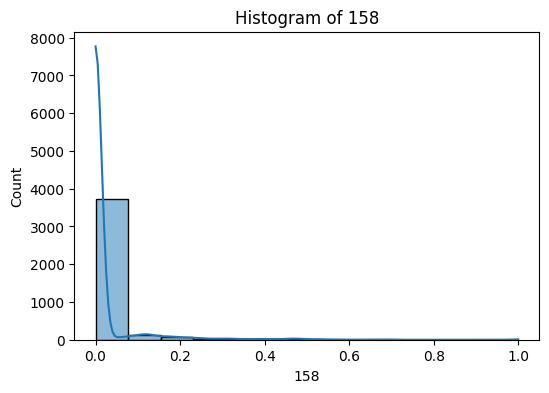

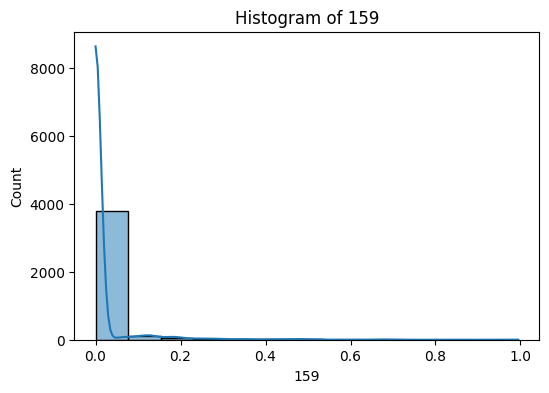

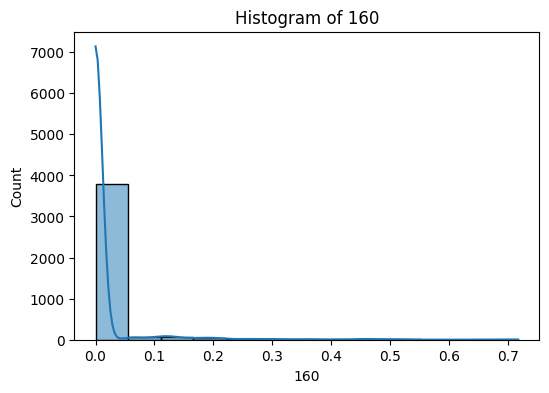

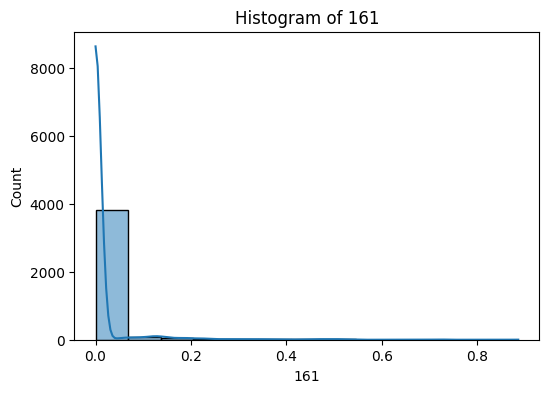

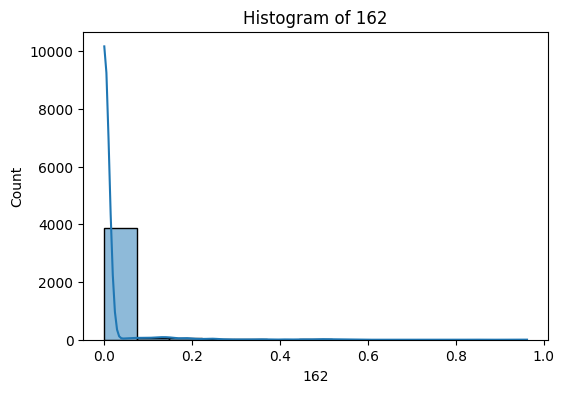

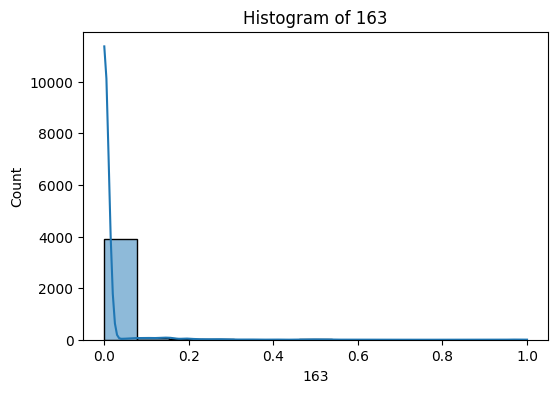

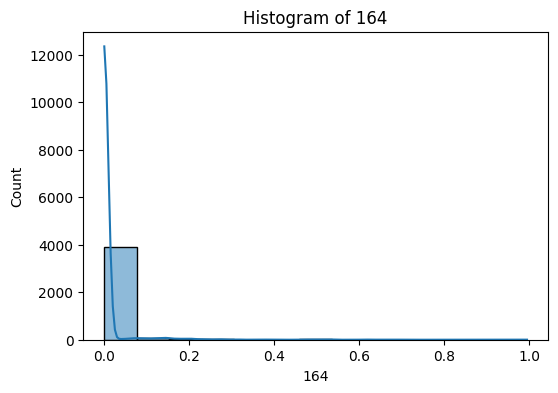

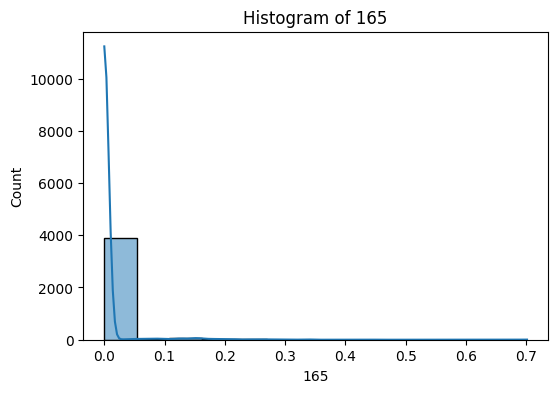

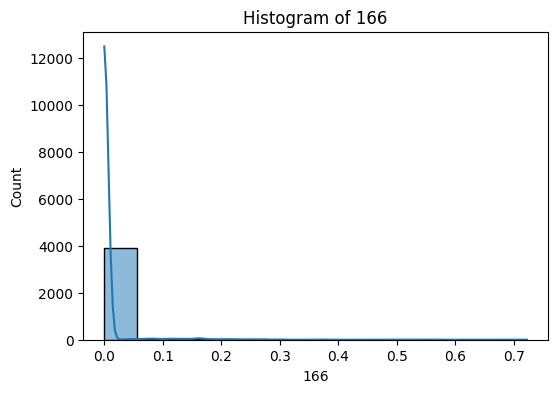

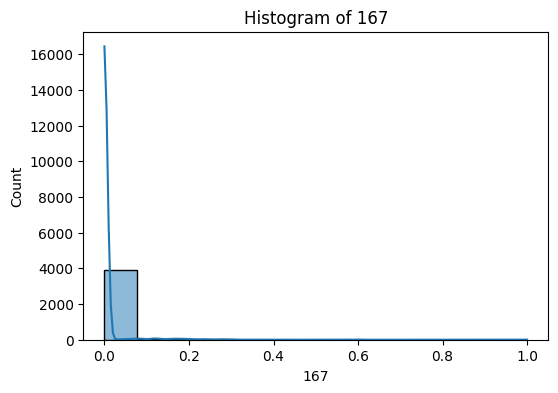

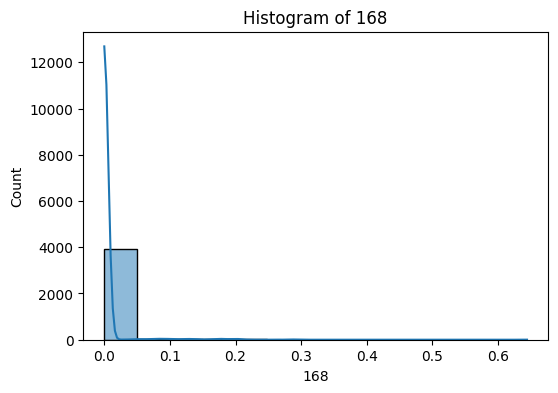

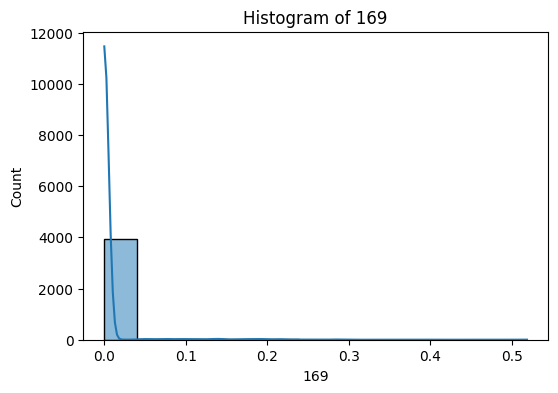

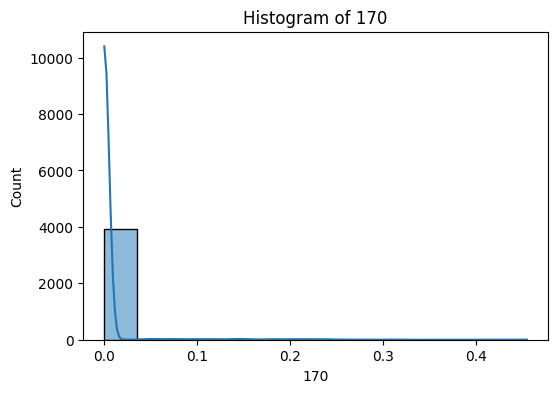

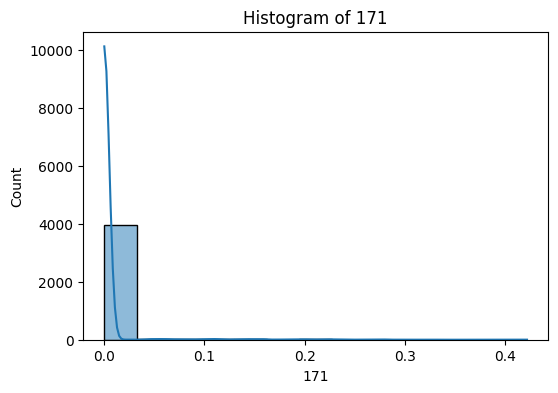

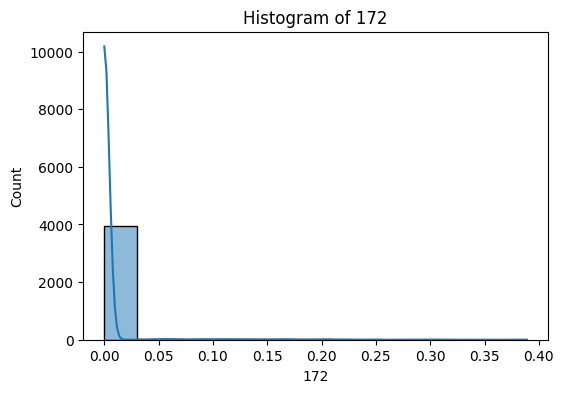

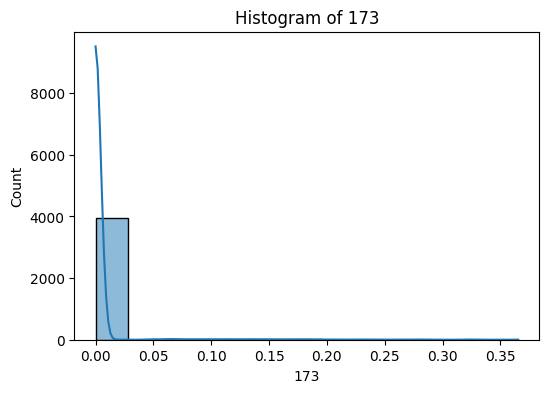

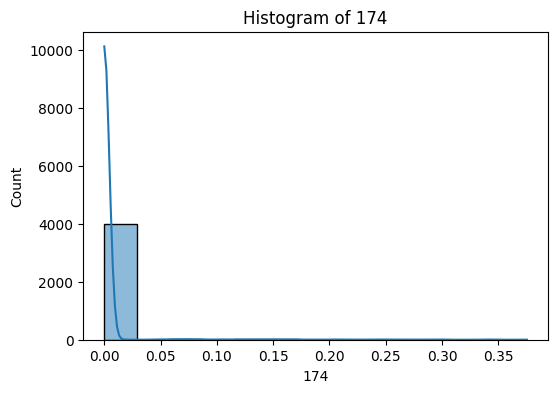

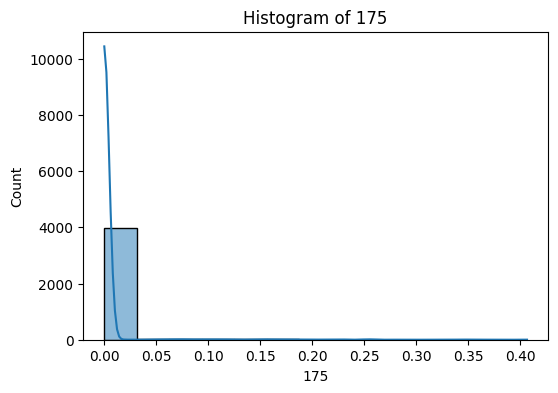

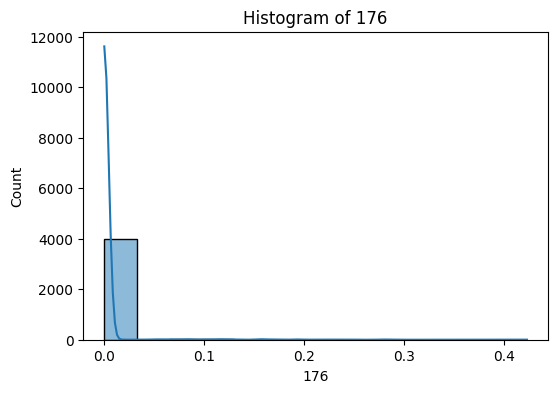

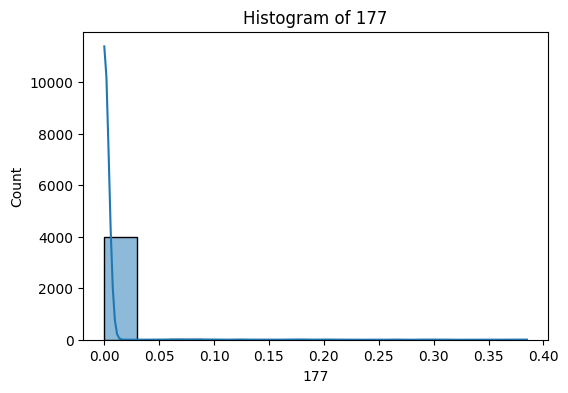

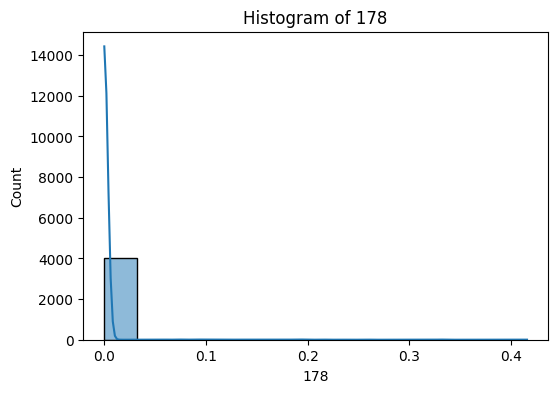

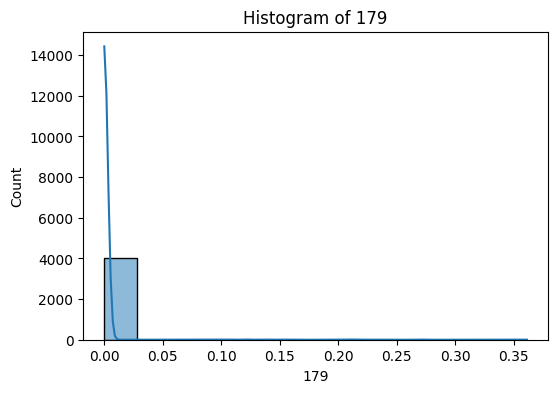

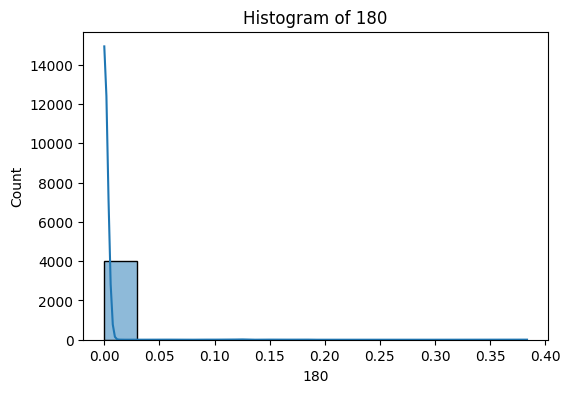

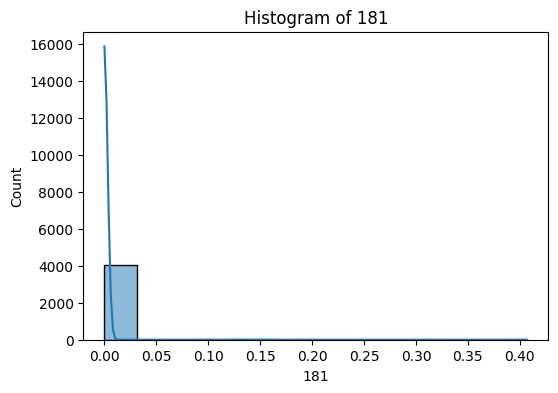

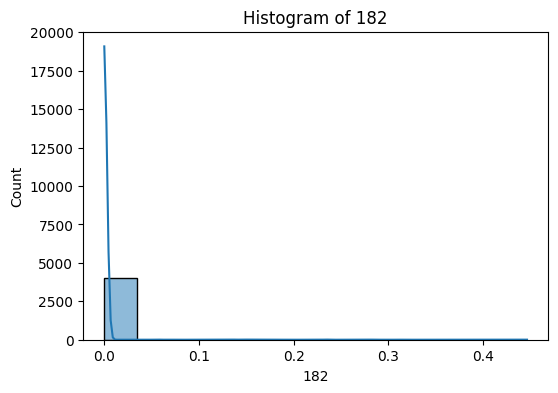

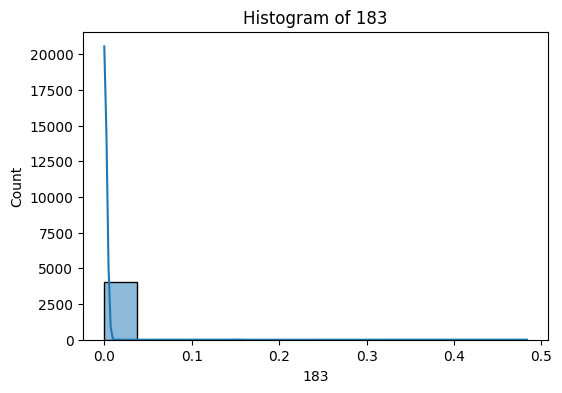

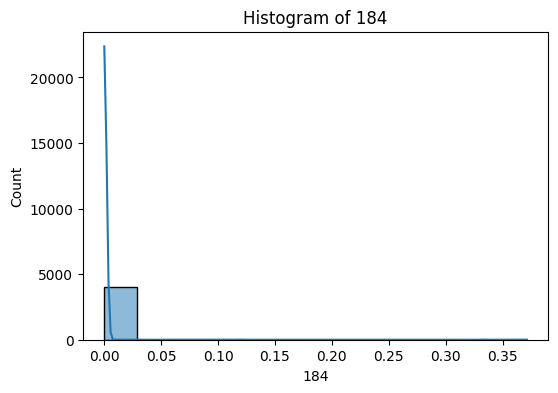

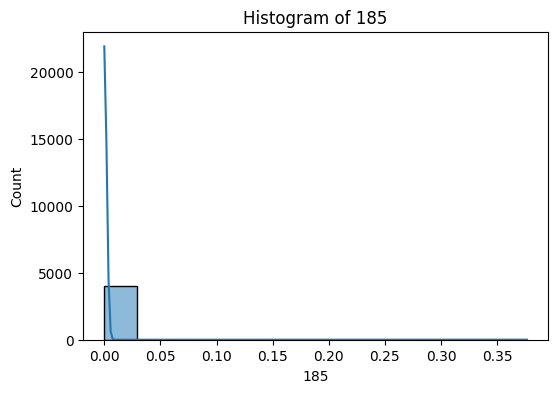

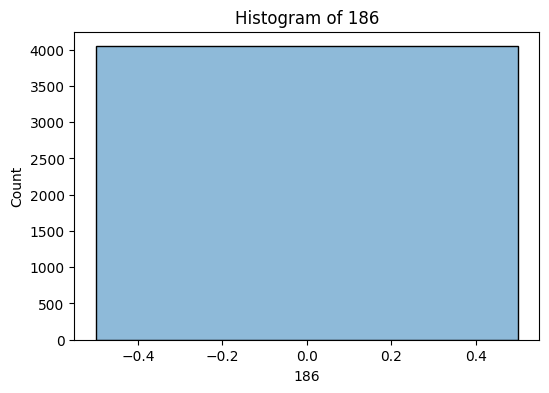

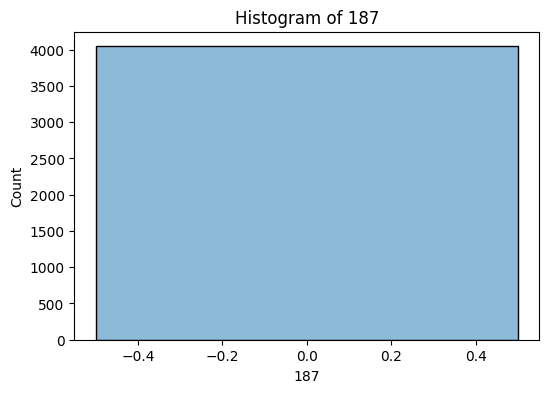

KeyboardInterrupt: ignored

In [ ]:

def explore_dataset(data):
    # Display basic info about the dataset
    print("Column Names:")
    print(data.columns.tolist())
    print("\nData Types:")
    print(data.dtypes)
    print("\nShape:")
    print(data.shape)
    print("\nInfo:")
    print(data.info())
    print("\nDescription:")
    print(data.describe())

    # Check for missing values
    print("\nMissing Values:")
    print(data.isnull().sum())

    # Visualizations
    # Histograms of numerical columns
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    for col in numerical_columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.show()

    # Pairplot for visualizing relationships between numerical columns
    sns.pairplot(data[numerical_columns])
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Call the function to explore your dataset
explore_dataset(normal_df)

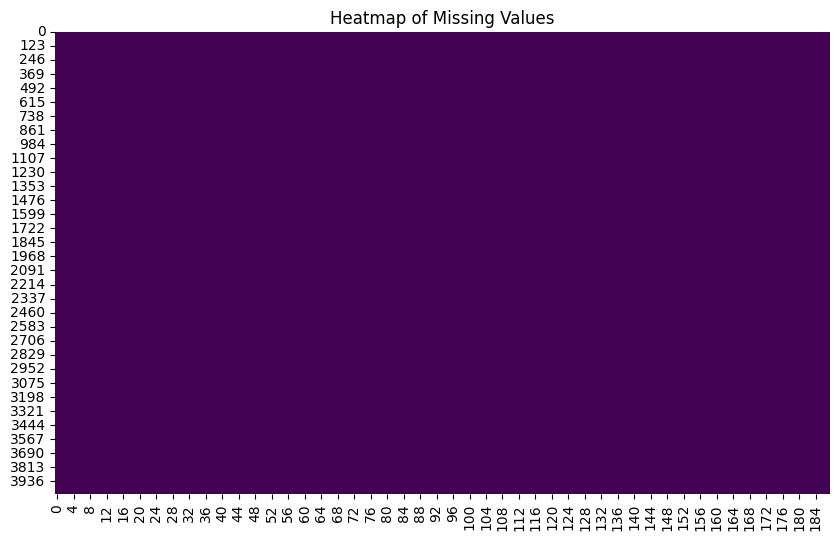

In [ ]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(normal_df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

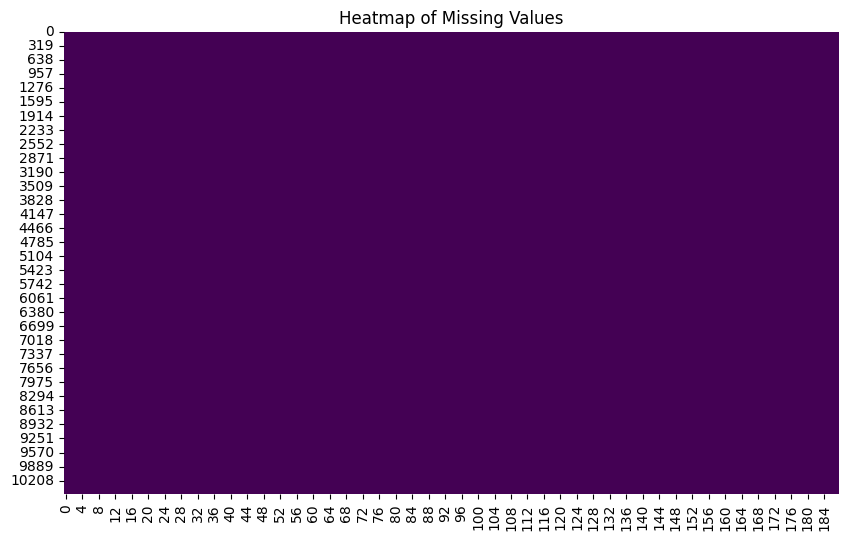

In [ ]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(abnormal_df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [ ]:
print(get_dataframe_info(abnormal_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB
{'Column Names': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187], '

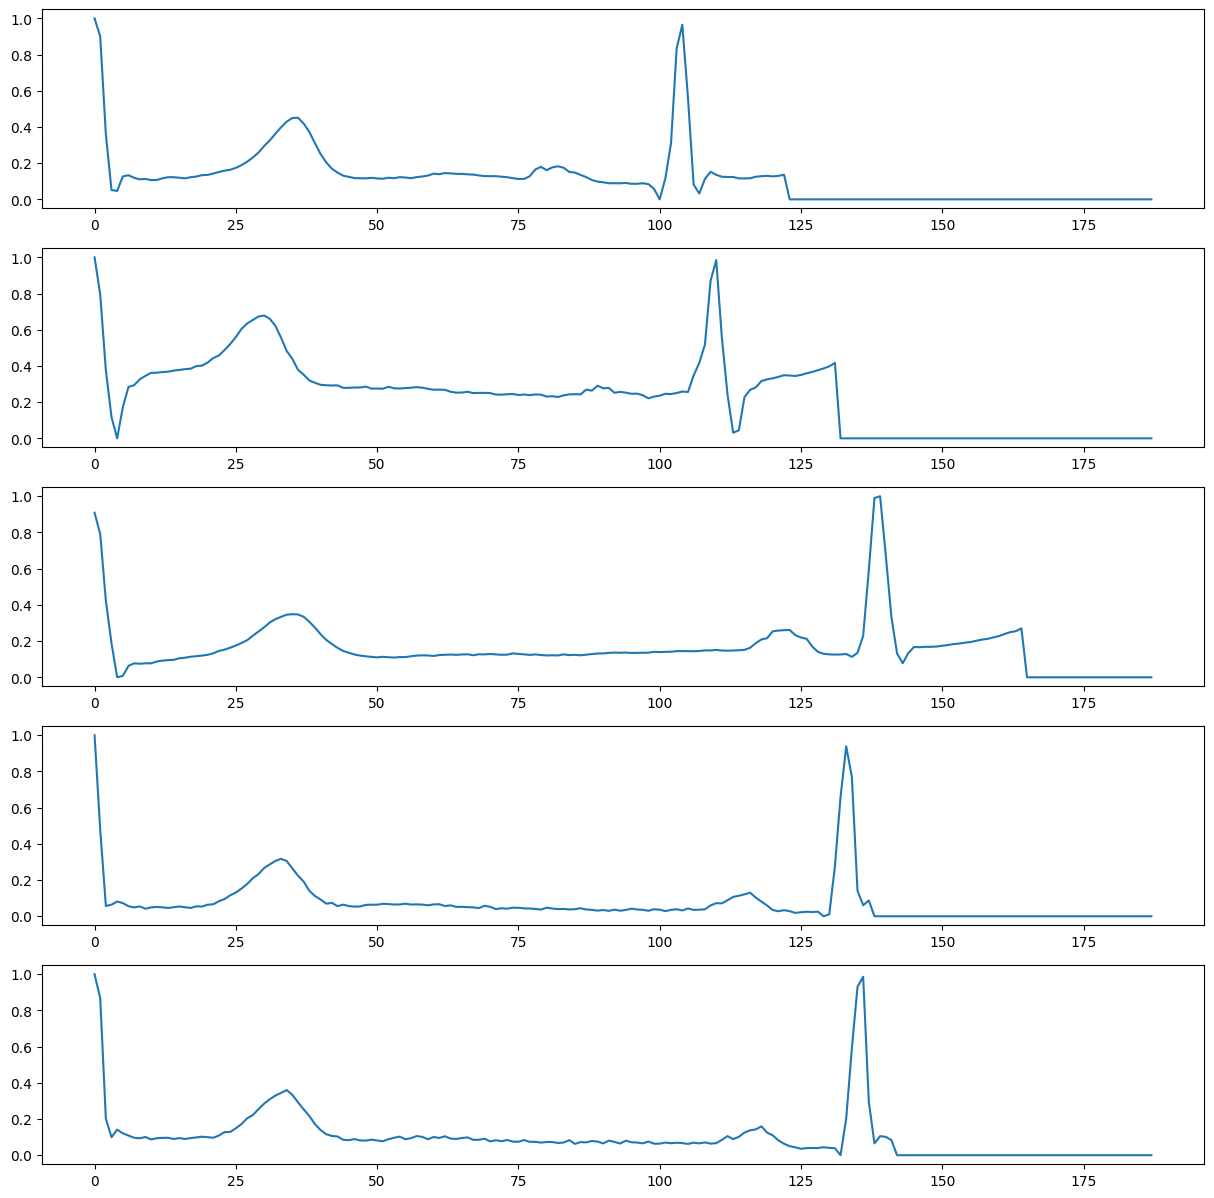

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/LLM_NOTEBOOKS/archive/ptbdb_normal.csv", header=None)
plt.figure(figsize=(15, 15))
plt.subplot(5, 1, 1)
plt.plot(df.loc[[0]].values[0])
plt.subplot(5, 1, 2)
plt.plot(df.loc[[1]].values[0])
plt.subplot(5, 1, 3)
plt.plot(df.loc[[2]].values[0])
plt.subplot(5, 1, 4)
plt.plot(df.loc[[3]].values[0])
plt.subplot(5, 1, 5)
plt.plot(df.loc[[4]].values[0])
plt.show()

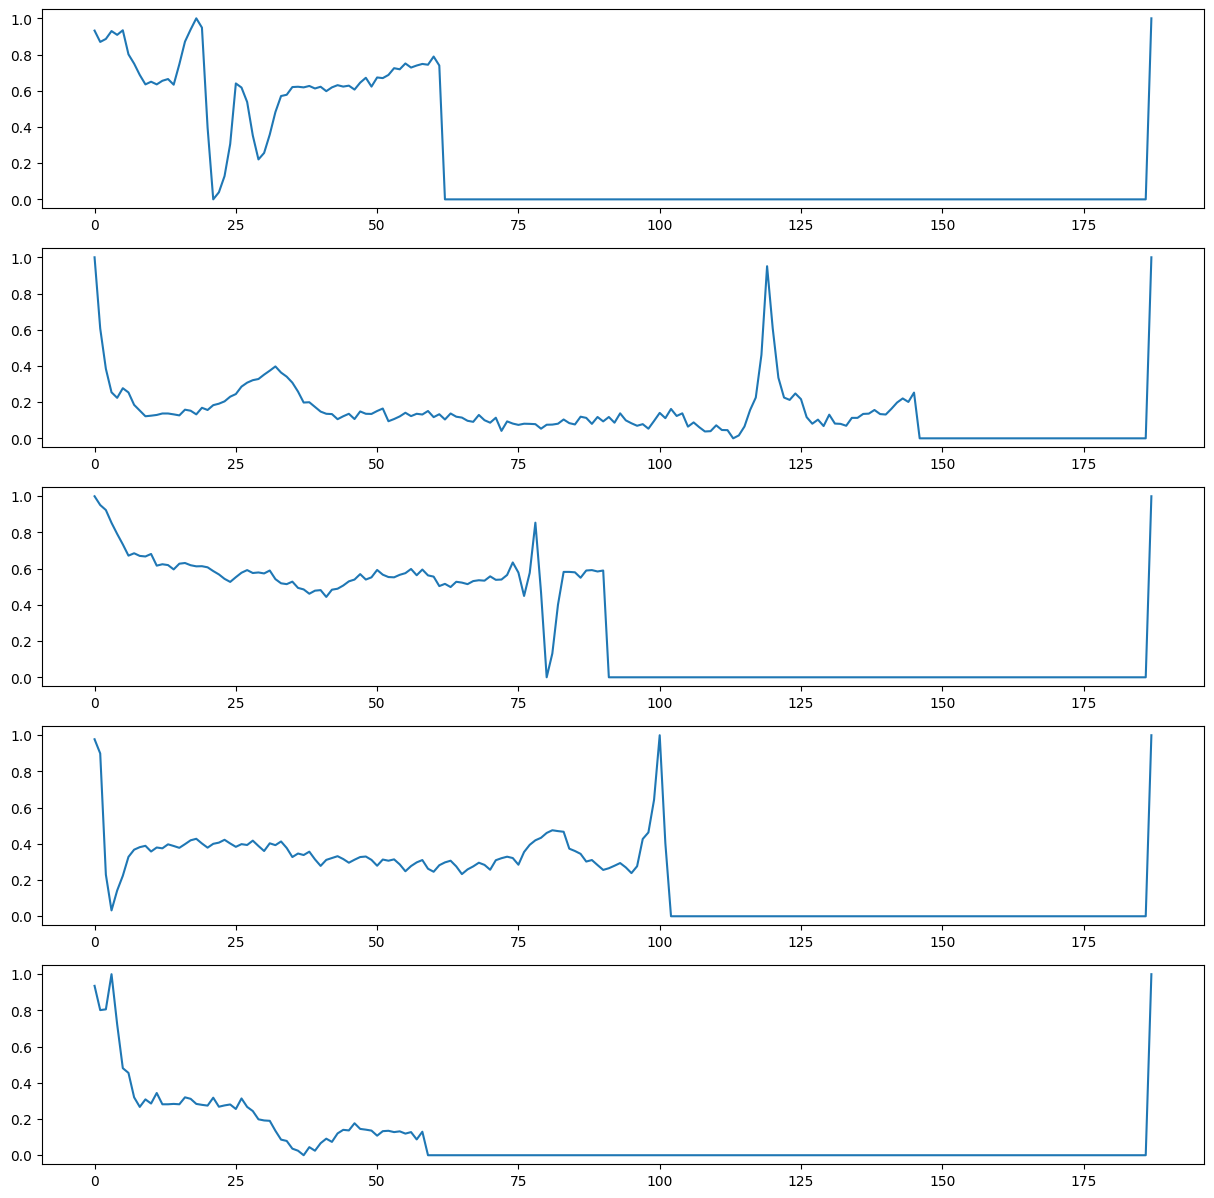

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/LLM_NOTEBOOKS/archive/ptbdb_abnormal.csv", header=None)
plt.figure(figsize=(15, 15))
plt.subplot(5, 1, 1)
plt.plot(df.loc[[0]].values[0])
plt.subplot(5, 1, 2)
plt.plot(df.loc[[1]].values[0])
plt.subplot(5, 1, 3)
plt.plot(df.loc[[2]].values[0])
plt.subplot(5, 1, 4)
plt.plot(df.loc[[3]].values[0])
plt.subplot(5, 1, 5)
plt.plot(df.loc[[4]].values[0])
plt.show()

## model

In [ ]:
normal = pd.read_csv("/content/drive/MyDrive/LLM_NOTEBOOKS/archive/ptbdb_normal.csv", header=None)#.to_numpy()
abnormal = pd.read_csv("/content/drive/MyDrive/LLM_NOTEBOOKS/archive/ptbdb_abnormal.csv", header=None)#.to_numpy()

In [ ]:
df=normal
df1=abnormal

In [ ]:
df

0         1         2         3         4         5         6    \
0     1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1     1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2     0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3     1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4     1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   
...        ...       ...       ...       ...       ...       ...       ...   
4041  1.000000  0.929586  0.503550  0.293491  0.169822  0.159763  0.130769   
4042  1.000000  0.637579  0.154837  0.061983  0.088965  0.083374  0.065143   
4043  1.000000  0.872574  0.465071  0.232212  0.126132  0.155886  0.174644   
4044  0.915983  0.529373  0.288406  0.144536  0.171802  0.180669  0.177566   
4045  1.000000  0.838643  0.390567  0.191146  0.033513  0.055854  0.129086   

           7         8         9    ...  178  179  180  181  182  183  184  \
0     0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
4041  0.125444  0.137278  0.111243  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4042  0.057365  0.060039  0.060039  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4043  0.190168  0.203752  0.168823  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4044  0.176458  0.178896  0.180448  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4045  0.147290  0.155151  0.165494  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      185  186  187  
0     0.0  0.0  0.0  
1     0.0  0.0  0.0  
2     0.0  0.0  0.0  
3     0.0  0.0  0.0  
4     0.0  0.0  0.0  
...   ...  ...  ...  
4041  0.0  0.0  0.0  
4042  0.0  0.0  0.0  
4043  0.0  0.0  0.0  
4044  0.0  0.0  0.0  
4045  0.0  0.0  0.0  

[4046 rows x 188 columns]

In [ ]:
X = df.values
a = np.concatenate((np.zeros(len(X)).astype(np.int16), np.array([1])))
y = np.zeros((a.size, a.max() + 1))
y[np.arange(a.size), a] = 1.
X_train, X_test, y_train, y_test = train_test_split(X, y[:-1], test_size=0.05, random_state=5)

In [ ]:
aX = df1.values
a = np.concatenate((np.ones(len(aX)).astype(np.int16), np.array([0])))
ay = np.zeros((a.size, a.max() + 1))
ay[np.arange(a.size), a] = 1.
aX_train, aX_test, ay_train, ay_test = train_test_split(aX, ay[:-1], test_size=0.05, random_state=5)

In [ ]:
X_tests, y_tests= np.concatenate((X_test, aX_test), axis = 0), np.concatenate((y_test, ay_test), axis = 0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Assuming X_train and y_train are your training features and labels

model = Sequential()

# Input layer
model.add(Dense(256, input_dim=188, activation='relu'))
model.add(BatchNormalization())  # Batch normalization after the activation
model.add(Dropout(0.3))  # Dropout for regularization

# Additional hidden layers with batch normalization and dropout
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, shuffle=True, validation_split=0.2)


Epoch 1/15
97/97 [==============================] - 3s 8ms/step - loss: 0.7337 - accuracy: 0.6470 - val_loss: 0.3904 - val_accuracy: 1.0000
Epoch 2/15
97/97 [==============================] - 1s 5ms/step - loss: 0.3994 - accuracy: 0.8878 - val_loss: 0.2010 - val_accuracy: 1.0000
Epoch 3/15
97/97 [==============================] - 1s 6ms/step - loss: 0.2049 - accuracy: 0.9691 - val_loss: 0.1046 - val_accuracy: 1.0000
Epoch 4/15
97/97 [==============================] - 1s 6ms/step - loss: 0.1041 - accuracy: 0.9899 - val_loss: 0.0460 - val_accuracy: 1.0000
Epoch 5/15
97/97 [==============================] - 1s 6ms/step - loss: 0.0546 - accuracy: 0.9971 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 6/15
97/97 [==============================] - 1s 9ms/step - loss: 0.0327 - accuracy: 0.9984 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 7/15
97/97 [==============================] - 1s 9ms/step - loss: 0.0220 - accuracy: 0.9990 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 8/15
97/97 [==

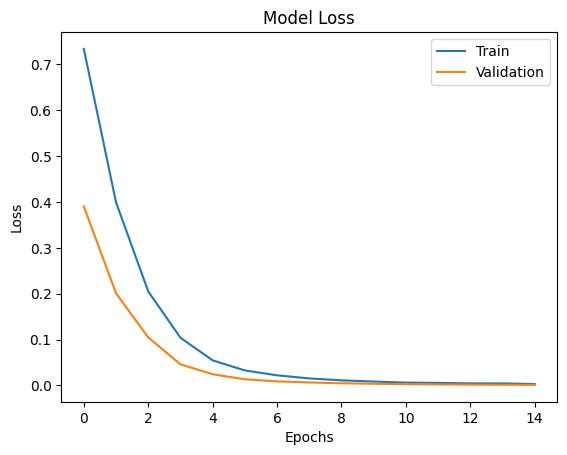

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' variable contains the training history from model.fit()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.0010 - accuracy: 1.0000


[0.0010286724427714944, 1.0]

In [ ]:
model.evaluate(X_tests, y_tests)

23/23 [==============================] - 0s 2ms/step - loss: 5.6132 - accuracy: 0.2785


[5.613169193267822, 0.2784636616706848]

In [ ]:
model.save('/content/drive/MyDrive/LLM_NOTEBOOKS/archive/my_model.keras')


In [ ]:
model.save_weights('/content/drive/MyDrive/LLM_NOTEBOOKS/archive/my_model_weights.h5')


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train and y_train are torch tensors or numpy arrays
# Convert X_train and y_train to PyTorch tensors if they're not already
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train and y_train are torch tensors or numpy arrays
# Convert X_train and y_train to PyTorch tensors if they're not already
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

# Define the PyTorch neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(188, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.4)
        self.fc4 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.dropout1(self.bn1(torch.relu(self.fc1(x))))
        x = self.dropout2(self.bn2(torch.relu(self.fc2(x))))
        x = self.dropout3(self.bn3(torch.relu(self.fc3(x))))
        x = torch.softmax(self.fc4(x), dim=1)
        return x

# Create an instance of the network
model = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


# Prepare a DataLoader if needed (for batch training)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# Training loop with loss and accuracy logging
num_epochs = 15
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    epoch_accuracy = 100 * correct / total
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch {epoch + 1}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}%")

# Save the model weights
torch.save(model.state_dict(), '/content/drive/MyDrive/LLM_NOTEBOOKS/archive/model_weights.pth')

# Plotting the training loss and accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()


In [ ]:

# Training loop
num_epochs = 15
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)

        # Convert the one-hot encoded labels to class indices
        _, labels_indices = torch.max(labels, 1)

        loss = criterion(outputs, labels_indices)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    print(f"Epoch {epoch + 1}, Loss: {epoch_loss}")

# Save the model weights
torch.save(model.state_dict(), '/content/drive/MyDrive/LLM_NOTEBOOKS/archive/model_weights.pth')

Epoch 1, Loss: 0.5999849450982306
Epoch 2, Loss: 0.4214448586475751
Epoch 3, Loss: 0.3442793628893608
Epoch 4, Loss: 0.32581139275850346
Epoch 5, Loss: 0.32013042480492393
Epoch 6, Loss: 0.3173130208795721
Epoch 7, Loss: 0.3157086066963259
Epoch 8, Loss: 0.31525352942056895
Epoch 9, Loss: 0.31471463520664816
Epoch 10, Loss: 0.3146853038102142
Epoch 11, Loss: 0.314274407122746
Epoch 12, Loss: 0.31403830302648306
Epoch 13, Loss: 0.31393040655073057
Epoch 14, Loss: 0.313747136553457
Epoch 15, Loss: 0.3136760316604425


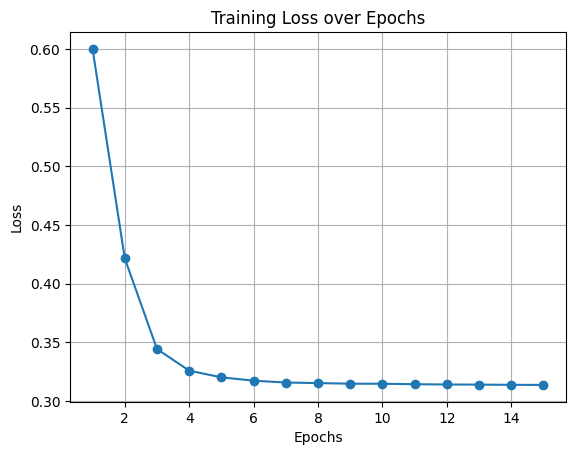

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, 16))  # Assuming 15 epochs as per your data
loss_values = train_losses

plt.plot(epochs, loss_values, marker='o', linestyle='-')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


## finetuning

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/LLM_NOTEBOOKS/archive/my_model.h5')


In [ ]:
history1 = model.fit(aX_train, ay_train, epochs=15, shuffle=True)

Epoch 1/15
312/312 [==============================] - 3s 8ms/step - loss: 0.8553 - accuracy: 0.7437
Epoch 2/15
312/312 [==============================] - 3s 9ms/step - loss: 0.0380 - accuracy: 0.9999
Epoch 3/15
312/312 [==============================] - 2s 7ms/step - loss: 0.0154 - accuracy: 0.9999
Epoch 4/15
312/312 [==============================] - 2s 7ms/step - loss: 0.0086 - accuracy: 0.9999
Epoch 5/15
312/312 [==============================] - 2s 8ms/step - loss: 0.0055 - accuracy: 0.9998
Epoch 6/15
312/312 [==============================] - 2s 6ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 7/15
312/312 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8/15
312/312 [==============================] - 2s 5ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 9/15
312/312 [==============================] - 1s 5ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/15
312/312 [==============================] - 2s 5ms/step - loss: 0.0012 - accuracy: 1.0000

In [ ]:
history1.history

{'loss': [0.8552681803703308,
  0.03799585998058319,
  0.015390189364552498,
  0.008623911999166012,
  0.005475682206451893,
  0.0037901203613728285,
  0.0027590570971369743,
  0.0019983844831585884,
  0.0013643930433318019,
  0.0011892967158928514,
  0.0009712640894576907,
  0.0007257555262185633,
  0.00058240961516276,
  0.0004652148636523634,
  0.00037999125197529793],
 'accuracy': [0.7436873912811279,
  0.9998998045921326,
  0.9998998045921326,
  0.9998998045921326,
  0.9997996091842651,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

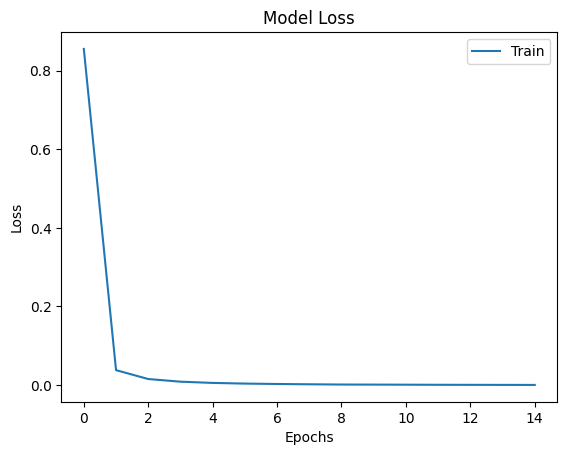

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' variable contains the training history from model.fit()

# Plot training & validation loss values
plt.plot(history1.history['loss'])

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
model.evaluate(X_tests, y_tests)

23/23 [==============================] - 0s 5ms/step - loss: 2.6506 - accuracy: 0.7215


[2.6506316661834717, 0.7215363383293152]

In [ ]:
history11 = model.fit(aX_train, ay_train, epochs=30, shuffle=True)

Epoch 1/30
312/312 [==============================] - 3s 11ms/step - loss: 3.0739e-04 - accuracy: 1.0000
Epoch 2/30
312/312 [==============================] - 3s 10ms/step - loss: 2.7847e-04 - accuracy: 1.0000
Epoch 3/30
312/312 [==============================] - 3s 10ms/step - loss: 2.2634e-04 - accuracy: 1.0000
Epoch 4/30
312/312 [==============================] - 3s 9ms/step - loss: 1.7699e-04 - accuracy: 1.0000
Epoch 5/30
312/312 [==============================] - 3s 9ms/step - loss: 1.5422e-04 - accuracy: 1.0000
Epoch 6/30
312/312 [==============================] - 6s 20ms/step - loss: 1.6026e-04 - accuracy: 1.0000
Epoch 7/30
312/312 [==============================] - 3s 11ms/step - loss: 1.0078e-04 - accuracy: 1.0000
Epoch 8/30
312/312 [==============================] - 2s 8ms/step - loss: 7.6773e-05 - accuracy: 1.0000
Epoch 9/30
312/312 [==============================] - 2s 6ms/step - loss: 6.7160e-05 - accuracy: 1.0000
Epoch 10/30
312/312 [==============================] - 1s 4

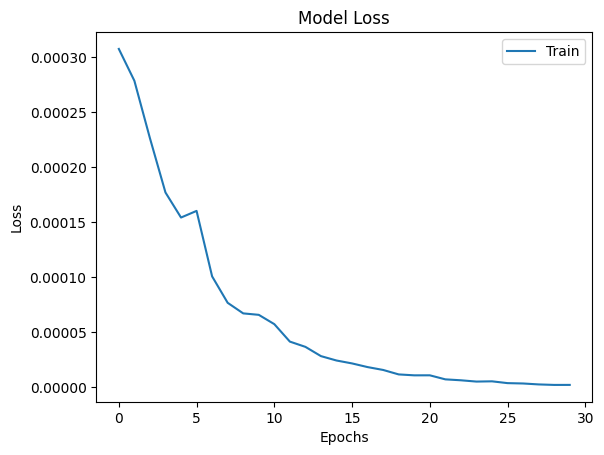

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' variable contains the training history from model.fit()

# Plot training & validation loss values
plt.plot(history11.history['loss'])

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
model.evaluate(X_tests, y_tests)

23/23 [==============================] - 0s 6ms/step - loss: 4.5758 - accuracy: 0.7215


[4.575812339782715, 0.7215363383293152]

In [ ]:
model.save('/content/drive/MyDrive/LLM_NOTEBOOKS/archive/my_model_finetuned.h5')
model.save('/content/drive/MyDrive/LLM_NOTEBOOKS/archive/my_model_finetuned.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
